In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
pd.options.display.max_columns = None

In [3]:
pd.options.display.max_rows = None

In [4]:
pd.options.mode.use_inf_as_na = True

In [5]:
pd.set_option('display.precision', 8)
pd.options.display.float_format = '{:.4f}'.format

pd.options.display.expand_frame_repr =  False

In [6]:
sns.set(style = "whitegrid")

In [7]:
fd = pd.read_csv('loan.csv')

C:\Users\shivam\AppData\Local\Temp\ipykernel_14696\3600323891.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  fd = pd.read_csv('loan.csv')


In [8]:
fd.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0000,36 months,10.65%,162.8700,B,B2,NaN,10+ years,RENT,24000.0000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.6500,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0000,0.0000,5863.1552,5833.8400,5000.0000,863.1600,0.0000,0.0000,0.0000,Jan-15,171.6200,NaN,May-16,0.0000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0000,60 months,15.27%,59.8300,C,C4,Ryder,< 1 year,RENT,30000.0000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.0000,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0000,0.0000,1008.7100,1008.7100,456.4600,435.1700,0.0000,117.0800,1.1100,Apr-13,119.6600,NaN,Sep-13,0.0000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0000,36 months,15.96%,84.3300,C,C5,NaN,10+ years,RENT,12252.0000,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.7200,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0000,0.0000,3005.6668,3005.6700,2400.0000,605.6700,0.0000,0.0000,0.0000,Jun-14,649.9100,NaN,May-16,0.0000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0000,36 months,13.49%,339.3100,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0000,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.0000,0,Feb-96,1,35.0000,NaN,10,0,5598,21%,37,f,0.0000,0.0000,12231.8900,12231.8900,10000.0000,2214.9200,16.9700,0.0000,0.0000,Jan-15,357.4800,NaN,Apr-16,0.0000,NaN,1,INDIVIDUAL,N

In [9]:
fd.shape

(39717, 111)

In [11]:
round(fd.isnull().sum(axis = 0)/len(fd), 2)*100

id                                 0.0000
member_id                          0.0000
loan_amnt                          0.0000
funded_amnt                        0.0000
funded_amnt_inv                    0.0000
term                               0.0000
int_rate                           0.0000
installment                        0.0000
grade                              0.0000
sub_grade                          0.0000
emp_title                          6.0000
emp_length                         3.0000
home_ownership                     0.0000
annual_inc                         0.0000
verification_status                0.0000
issue_d                            0.0000
loan_status                        0.0000
pymnt_plan                         0.0000
url                                0.0000
desc                              33.0000
purpose                            0.0000
title                              0.0000
zip_code                           0.0000
addr_state                        

In [12]:
cols = pd.DataFrame(data = round(fd.isnull().sum(axis = 0)/len(fd), 2)*100, columns = ['null_percent'])
fd.drop(labels = cols[cols.null_percent >= 30].index,axis = 1, inplace = True)

In [13]:
rows = pd.DataFrame(data = round(fd.isnull().sum(axis = 1)/len(fd),2)*100, columns = ['null_percent'])
rows[rows.null_percent >=1].index

Int64Index([], dtype='int64')

In [14]:
fd.drop(labels = ['id', 'member_id', 'verification_status', 'pymnt_plan', 'url', 'zip_code', 'initial_list_status', 
                    'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 
                    'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'title', 'total_rec_prncp', 
                    'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
                    'last_pymnt_amnt', 'revol_bal'],
          axis = 1, inplace = True
         )

In [15]:
fd = fd[fd.home_ownership != 'NONE']

In [16]:
fd.drop_duplicates(keep = 'first', inplace = True)

In [18]:
print(fd.annual_inc.describe())
print('\n')

count     39714.0000
mean      68968.0377
std       63795.0396
min        4000.0000
25%       40404.5000
50%       59000.0000
75%       82299.0000
max     6000000.0000
Name: annual_inc, dtype: float64




[]

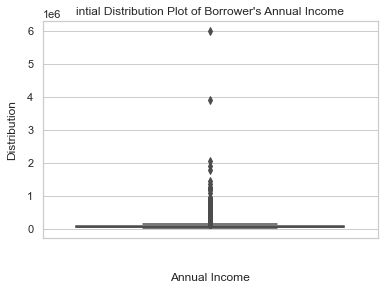

In [20]:
plt.title("intial Distribution Plot of Borrower's Annual Income")
sns.boxplot(y = 'annual_inc', data = fd)
plt.xlabel('Annual Income' , labelpad = 25)
plt.ylabel('Distribution', labelpad = 10)
plt.plot()

In [21]:
qnt = fd.annual_inc.quantile(0.99)
print('Quantile Value =', qnt)
print('\n')
fd = fd[fd.annual_inc < qnt]
print('\n')


Quantile Value = 234999.48






<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

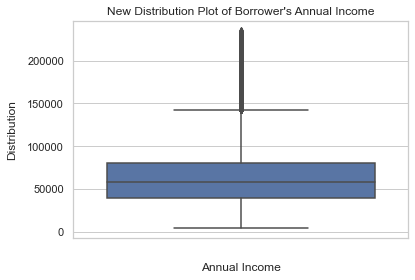

In [22]:
plt.title("New Distribution Plot of Borrower's Annual Income")
sns.boxplot(y = 'annual_inc', data = fd)
plt.xlabel('Annual Income', labelpad = 15)
plt.ylabel('Distribution', labelpad = 10)
plt.plot

In [23]:
fd.shape

(39316, 31)

In [24]:
fd.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0000,36 months,10.65%,162.8700,B,B2,NaN,10+ years,RENT,24000.0000,Dec-11,Fully Paid,credit_card,AZ,27.6500,0,Jan-85,1,3,0,83.70%,9,0.0000,0.0000,5863.1552,5833.8400,Jan-15,May-16,0.0000
1,2500,2500,2500.0000,60 months,15.27%,59.8300,C,C4,Ryder,< 1 year,RENT,30000.0000,Dec-11,Charged Off,car,GA,1.0000,0,Apr-99,5,3,0,9.40%,4,0.0000,0.0000,1008.7100,1008.7100,Apr-13,Sep-13,0.0000
2,2400,2400,2400.0000,36 months,15.96%,84.3300,C,C5,NaN,10+ years,RENT,12252.0000,Dec-11,Fully Paid,small_business,IL,8.7200,0,Nov-01,2,2,0,98.50%,10,0.0000,0.0000,3005.6668,3005.6700,Jun-14,May-16,0.0000
3,10000,10000,10000.0000,36 months,13.49%,339.3100,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0000,Dec-11,Fully Paid,other,CA,20.0000,0,Feb-96,1,10,0,21%,37,0.0000,0.0000,12231.8900,12231.8900,Jan-15,Apr-16,0.0000
4,3000,3000,3000.0000,60 months,12.69%,67.7900,B,B5,University Medical Group,1 year,RENT,80000.0000,Dec-11,Current,other,OR,17.9400,0,Jan-96,0,15,0,53.90%,38,524.0600,524.0600,3513.3300,3513.3300,May-16,May-16,0.0000


In [25]:
fd['int_rate'] = [x[0:-1] for x in fd.int_rate]

In [26]:
fd.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0000,36 months,10.65,162.8700,B,B2,NaN,10+ years,RENT,24000.0000,Dec-11,Fully Paid,credit_card,AZ,27.6500,0,Jan-85,1,3,0,83.70%,9,0.0000,0.0000,5863.1552,5833.8400,Jan-15,May-16,0.0000
1,2500,2500,2500.0000,60 months,15.27,59.8300,C,C4,Ryder,< 1 year,RENT,30000.0000,Dec-11,Charged Off,car,GA,1.0000,0,Apr-99,5,3,0,9.40%,4,0.0000,0.0000,1008.7100,1008.7100,Apr-13,Sep-13,0.0000
2,2400,2400,2400.0000,36 months,15.96,84.3300,C,C5,NaN,10+ years,RENT,12252.0000,Dec-11,Fully Paid,small_business,IL,8.7200,0,Nov-01,2,2,0,98.50%,10,0.0000,0.0000,3005.6668,3005.6700,Jun-14,May-16,0.0000
3,10000,10000,10000.0000,36 months,13.49,339.3100,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0000,Dec-11,Fully Paid,other,CA,20.0000,0,Feb-96,1,10,0,21%,37,0.0000,0.0000,12231.8900,12231.8900,Jan-15,Apr-16,0.0000
4,3000,3000,3000.0000,60 months,12.69,67.7900,B,B5,University Medical Group,1 year,RENT,80000.0000,Dec-11,Current,other,OR,17.9400,0,Jan-96,0,15,0,53.90%,38,524.0600,524.0600,3513.3300,3513.3300,May-16,May-16,0.0000


In [27]:
fd['int_rate'] = pd.to_numeric(fd.int_rate)

In [28]:
fd.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0000,36 months,10.6500,162.8700,B,B2,NaN,10+ years,RENT,24000.0000,Dec-11,Fully Paid,credit_card,AZ,27.6500,0,Jan-85,1,3,0,83.70%,9,0.0000,0.0000,5863.1552,5833.8400,Jan-15,May-16,0.0000
1,2500,2500,2500.0000,60 months,15.2700,59.8300,C,C4,Ryder,< 1 year,RENT,30000.0000,Dec-11,Charged Off,car,GA,1.0000,0,Apr-99,5,3,0,9.40%,4,0.0000,0.0000,1008.7100,1008.7100,Apr-13,Sep-13,0.0000
2,2400,2400,2400.0000,36 months,15.9600,84.3300,C,C5,NaN,10+ years,RENT,12252.0000,Dec-11,Fully Paid,small_business,IL,8.7200,0,Nov-01,2,2,0,98.50%,10,0.0000,0.0000,3005.6668,3005.6700,Jun-14,May-16,0.0000
3,10000,10000,10000.0000,36 months,13.4900,339.3100,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0000,Dec-11,Fully Paid,other,CA,20.0000,0,Feb-96,1,10,0,21%,37,0.0000,0.0000,12231.8900,12231.8900,Jan-15,Apr-16,0.0000
4,3000,3000,3000.0000,60 months,12.6900,67.7900,B,B5,University Medical Group,1 year,RENT,80000.0000,Dec-11,Current,other,OR,17.9400,0,Jan-96,0,15,0,53.90%,38,524.0600,524.0600,3513.3300,3513.3300,May-16,May-16,0.0000


In [30]:
fd['issue_yr'] = pd.to_datetime(fd['issue_d'], format  = '%b-%y').dt.year

In [31]:
fd.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,issue_yr
0,5000,5000,4975.0000,36 months,10.6500,162.8700,B,B2,NaN,10+ years,RENT,24000.0000,Dec-11,Fully Paid,credit_card,AZ,27.6500,0,Jan-85,1,3,0,83.70%,9,0.0000,0.0000,5863.1552,5833.8400,Jan-15,May-16,0.0000,2011
1,2500,2500,2500.0000,60 months,15.2700,59.8300,C,C4,Ryder,< 1 year,RENT,30000.0000,Dec-11,Charged Off,car,GA,1.0000,0,Apr-99,5,3,0,9.40%,4,0.0000,0.0000,1008.7100,1008.7100,Apr-13,Sep-13,0.0000,2011
2,2400,2400,2400.0000,36 months,15.9600,84.3300,C,C5,NaN,10+ years,RENT,12252.0000,Dec-11,Fully Paid,small_business,IL,8.7200,0,Nov-01,2,2,0,98.50%,10,0.0000,0.0000,3005.6668,3005.6700,Jun-14,May-16,0.0000,2011
3,10000,10000,10000.0000,36 months,13.4900,339.3100,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0000,Dec-11,Fully Paid,other,CA,20.0000,0,Feb-96,1,10,0,21%,37,0.0000,0.0000,12231.8900,12231.8900,Jan-15,Apr-16,0.0000,2011
4,3000,3000,3000.0000,60 months,12.6900,67.7900,B,B5,University Medical Group,1 year,RENT,80000.0000,Dec-11,Current,other,OR,17.9400,0,Jan-96,0,15,0,53.90%,38,524.0600,524.0600,3513.3300,3513.3300,May-16,May-16,0.0000,2011


In [32]:
#custom function for Default plotting variables
def set_plotting_variable(figure_title,xlabel,ylabel,xlabel_rotation,legend_flag,legend):
    plt.title(figure_title)
    plt.xticks(rotation = xlabel_rotation)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend_flag == True:
        plt.legend(loc = legend)

In [34]:
fd[fd.loan_amnt != fd.funded_amnt].loan_amnt.count()

1820

In [35]:
def plot_univariate(category, plot_type, series, figsize_x, figsize_y, subplot_x, subplot_y,
                    xlabel, ylabel, x_axis, hue, data, legend, hspace, wspace, xlabel_rotation):
    
    plt.figure(figsize = (figsize_x, figsize_y))
    
    if category == 'Categorical':
        
        title_1 = "Frequency Plot of " + xlabel
        title_2 = title_1 + " across Loan Status"
        
        # Subplot - 1
        plt.subplot(subplot_x, subplot_y, 1)
        
        if plot_type == 'Unordered Categorical':
            sns.lineplot(data = series)
        
        elif plot_type == 'Ordered Categorical':
            sns.countplot(x = x_axis, order = series.sort_index().index, data = data)
        
        # Call Custom Function
        set_plotting_variable(title_1, xlabel, ylabel, xlabel_rotation, False, legend)
        
        # Subplot - 2
        plt.subplot(subplot_x, subplot_y, 2)
        
        sns.countplot(x = x_axis, hue = hue, order = series.sort_index().index, data = data)
        # Call Custom Function
        set_plotting_variable(title_2, xlabel, ylabel, xlabel_rotation, True, legend)
    
    elif category == 'Continuous':
        
        title_1 = "Distribution Plot of " + xlabel
        title_2 = "Box Plot of " + xlabel
        title_3 = title_2 + " across Loan Status"
        
        # Subplot - 1
        plt.subplot(subplot_x, subplot_y, 1)
        
        sns.distplot(data[x_axis], hist = True, kde = True, color = 'g')
        # Call Custom Function
        set_plotting_variable(title_1, xlabel, ylabel, xlabel_rotation, False, legend)
        
        # Subplot - 2
        plt.subplot(subplot_x, subplot_y, 2)
        
        sns.boxplot(x = x_axis, data = data, color = 'm')
        # Call Custom Function
        set_plotting_variable(title_2, xlabel, ylabel, xlabel_rotation, False, legend)
        
        # Subplot - 3
        plt.subplot(subplot_x, subplot_y, 3)
        
        sns.boxplot(x = x_axis, y = hue, order = series, data = data)
        # Call Custom Function
        set_plotting_variable(title_3, xlabel, "Loan Status", xlabel_rotation, False, legend)
    
    plt.subplots_adjust(hspace = hspace)
    plt.subplots_adjust(wspace = wspace)
    plt.show()

Charged Off     5584
Current         1126
Fully Paid     32606
Name: loan_status, dtype: int64




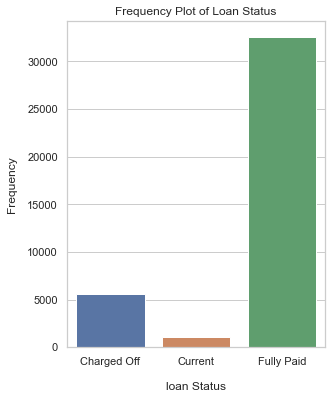

In [36]:
series = fd.loan_status.value_counts(dropna = False)
print(series.sort_index())
print('\n')
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)

plt.title('Frequency Plot of Loan Status')
sns.countplot(x = 'loan_status',
             order = series.sort_index().index,
             data = fd)
plt.xlabel('loan Status',labelpad = 15)
plt.ylabel('Frequency', labelpad = 10)
plt.subplots_adjust(wspace = 0.6)
plt.show()


Charged Off     5584
Current         1126
Fully Paid     32606
Name: loan_status, dtype: int64


loan_status  home_ownership
Charged Off  MORTGAGE           2302
             OTHER                18
             OWN                 440
             RENT               2824
Current      MORTGAGE            628
             OWN                  82
             RENT                416
Fully Paid   MORTGAGE          14448
             OTHER                78
             OWN                2507
             RENT              15573
Name: home_ownership, dtype: int64




<AxesSubplot:xlabel='home_ownership'>

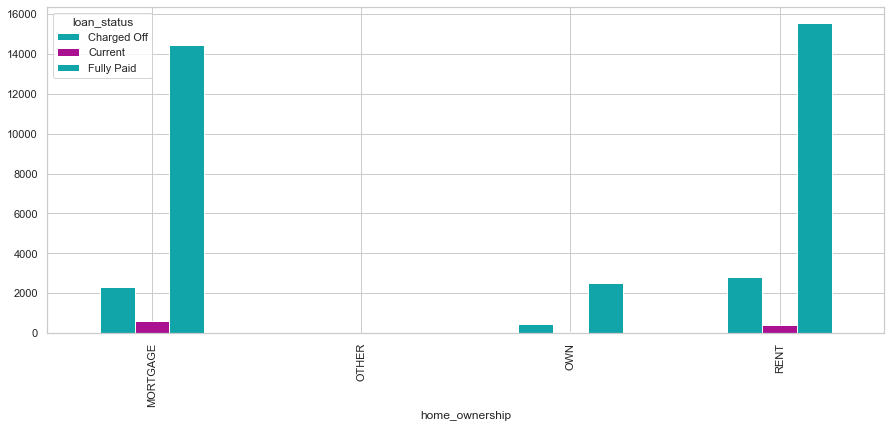

In [41]:

Series = fd.home_ownership.value_counts(dropna = False)
print(series.sort_index())
print('\n')
print(fd.groupby(by = 'loan_status').home_ownership.value_counts(dropna = False).sort_index())
print('\n')


pd.crosstab(fd.home_ownership,fd.loan_status).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])


In [33]:
 ##With the help of sorting we can say that RENT & MORTAGE is high for CHARGED OFF


car                    1542
credit_card            5089
debt_consolidation    18496
educational             323
home_improvement       2894
house                   371
major_purchase         2166
medical                 686
moving                  577
other                  3956
renewable_energy        101
small_business         1797
vacation                381
wedding                 937
Name: purpose, dtype: int64


loan_status  purpose           
Charged Off  car                     160
             credit_card             537
             debt_consolidation     2752
             educational              55
             home_improvement        338
             house                    58
             major_purchase          220
             medical                 106
             moving                   91
             other                   629
             renewable_energy         19
             small_business          472
             vacation                 53
             

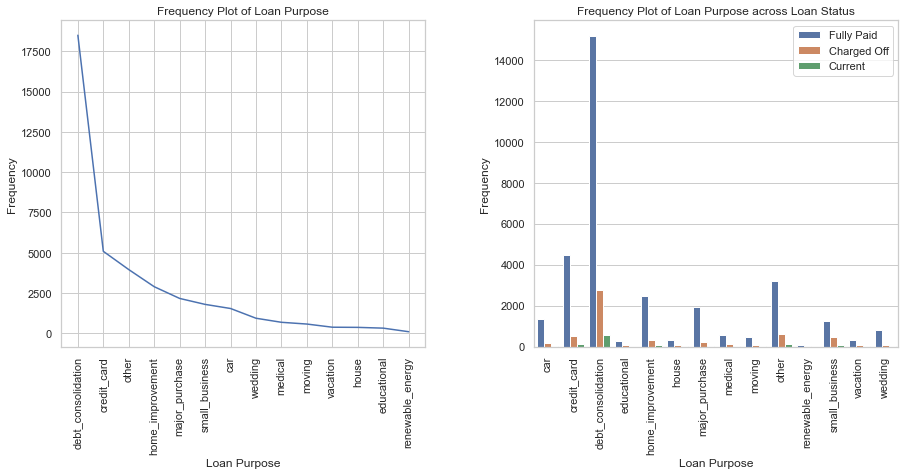

In [42]:
series = fd.purpose.value_counts(dropna = False)
print(series.sort_index())
print('\n')
print(fd.groupby(by = 'loan_status').purpose.value_counts(dropna = False).sort_index())
print('\n')
plot_univariate(category = 'Categorical',
               plot_type = 'Unordered Categorical',
               series = series,
               figsize_x = 15,
               figsize_y = 6,
               subplot_x = 1,
               subplot_y = 2,
               xlabel = "Loan Purpose",
               ylabel = "Frequency",
               x_axis = 'purpose',
               hue = 'loan_status',
               data = fd,
               legend = 'best',
               hspace = 0,
               wspace = 0.3,
               xlabel_rotation = 90)



With the help of this analysis, Top 3 loan purpose are:
1) debt_consolidation
2) other
3) credit card

Rank-frequency plot of unordered categorical variable: addr_state


In [43]:
series = fd.addr_state.value_counts(dropna = False)
print(series.sort_index())
print('\n')


AK      79
AL     449
AR     245
AZ     869
CA    7031
CO     782
CT     736
DC     214
DE     114
FL    2834
GA    1388
HI     174
IA       5
ID       6
IL    1505
IN       9
KS     271
KY     324
LA     429
MA    1320
MD    1036
ME       3
MI     714
MN     613
MO     681
MS      19
MT      85
NC     781
NE       5
NH     169
NJ    1826
NM     184
NV     492
NY    3755
OH    1217
OK     298
OR     451
PA    1508
RI     194
SC     468
SD      64
TN      17
TX    2694
UT     257
VA    1395
VT      54
WA     833
WI     459
WV     177
WY      83
Name: addr_state, dtype: int64




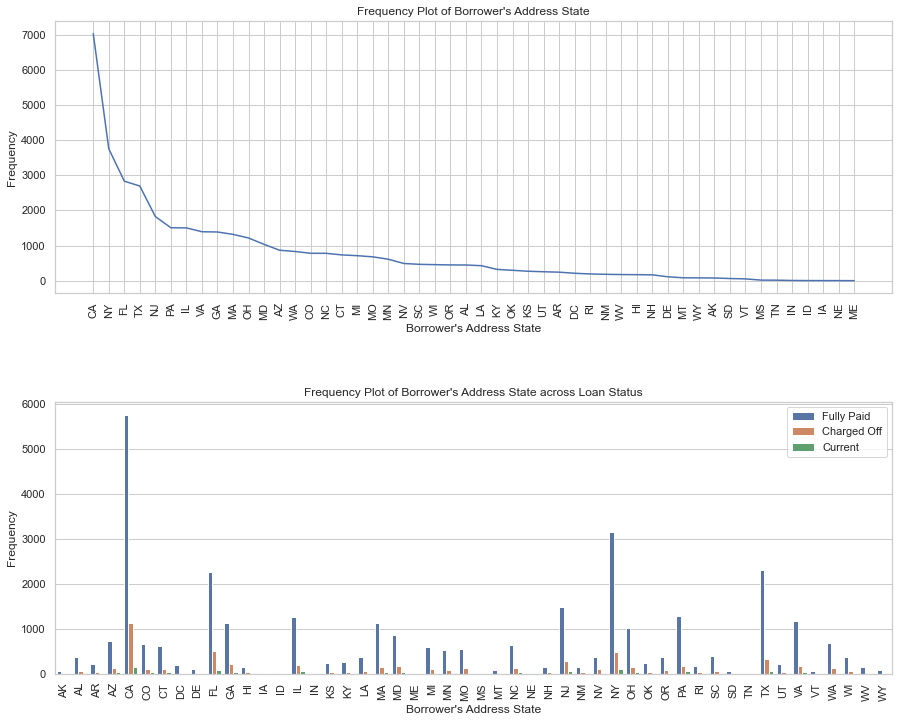

In [44]:
plot_univariate(category = 'Categorical',
               plot_type = 'Unordered Categorical',
               series = series,
               figsize_x = 15,
               figsize_y = 12,
               subplot_x = 2,
               subplot_y = 1,
               xlabel = "Borrower's Address State",
               ylabel = "Frequency",
               x_axis = 'addr_state',
               hue = 'loan_status',
               data = fd,
               legend = 'best',
               hspace = 0.4,
               wspace = 0,
               xlabel_rotation = 90)

According to the above plot we can say that the Top 3 Address state of charged off are:


1)CA  
2)NY  
3)FL  


In [45]:
fd.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,issue_yr
0,5000,5000,4975.0000,36 months,10.6500,162.8700,B,B2,NaN,10+ years,RENT,24000.0000,Dec-11,Fully Paid,credit_card,AZ,27.6500,0,Jan-85,1,3,0,83.70%,9,0.0000,0.0000,5863.1552,5833.8400,Jan-15,May-16,0.0000,2011
1,2500,2500,2500.0000,60 months,15.2700,59.8300,C,C4,Ryder,< 1 year,RENT,30000.0000,Dec-11,Charged Off,car,GA,1.0000,0,Apr-99,5,3,0,9.40%,4,0.0000,0.0000,1008.7100,1008.7100,Apr-13,Sep-13,0.0000,2011
2,2400,2400,2400.0000,36 months,15.9600,84.3300,C,C5,NaN,10+ years,RENT,12252.0000,Dec-11,Fully Paid,small_business,IL,8.7200,0,Nov-01,2,2,0,98.50%,10,0.0000,0.0000,3005.6668,3005.6700,Jun-14,May-16,0.0000,2011
3,10000,10000,10000.0000,36 months,13.4900,339.3100,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0000,Dec-11,Fully Paid,other,CA,20.0000,0,Feb-96,1,10,0,21%,37,0.0000,0.0000,12231.8900,12231.8900,Jan-15,Apr-16,0.0000,2011
4,3000,3000,3000.0000,60 months,12.6900,67.7900,B,B5,University Medical Group,1 year,RENT,80000.0000,Dec-11,Current,other,OR,17.9400,0,Jan-96,0,15,0,53.90%,38,524.0600,524.0600,3513.3300,3513.3300,May-16,May-16,0.0000,2011


# Ordered Categorical variable are :
1) term   
2) grade  
3) sub_grade  
4) emp_length  
5) issue_yr  

### Rank-Frequency Plot of ordered Categorical variable: term

In [46]:
series = fd.term.value_counts(dropna = False)
print(series.sort_index())
print('\n')
print(fd.groupby(by = 'loan_status').term.value_counts(dropna = False).sort_index())
print('\n')

 36 months    28817
 60 months    10499
Name: term, dtype: int64


loan_status  term      
Charged Off   36 months     3201
              60 months     2383
Current       60 months     1126
Fully Paid    36 months    25616
              60 months     6990
Name: term, dtype: int64




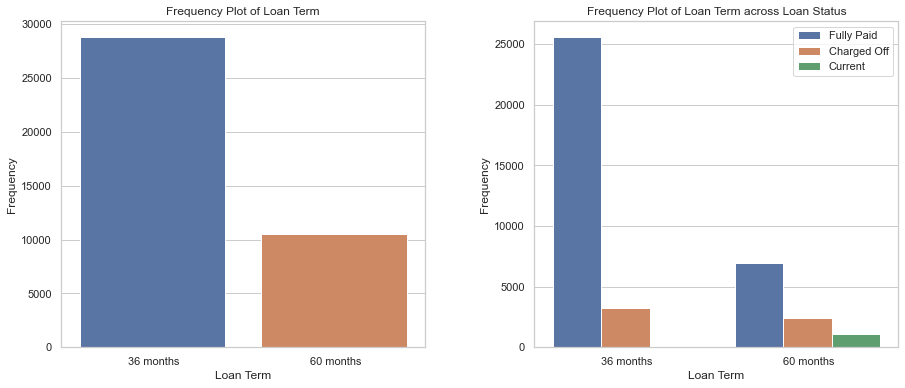

In [47]:
#Call Custom Function
plot_univariate(category = 'Categorical',
               plot_type = 'Ordered Categorical',
               series = series,
               figsize_x = 15,
               figsize_y = 6,
               subplot_x = 1,
               subplot_y = 2,
               xlabel = "Loan Term",
               ylabel = "Frequency",
               x_axis = 'term',
               hue = 'loan_status',
               data = fd,
               legend = 'best',
               hspace = 0,
               wspace = 0.3,
               xlabel_rotation = 0)

### With the help of above graph we can say that most of the Charged Off applicants are from  36 months loan term

### Rank- Frequency plot of ordered Categorical Variable : Grade

In [48]:
series = fd.grade.value_counts(dropna = False)
print(series.sort_index())
print('\n')
print(fd.groupby(by = 'loan_status').grade.value_counts(dropna = False).sort_index())
print('\n')

A    10017
B    11923
C     8015
D     5244
E     2786
F     1025
G      306
Name: grade, dtype: int64


loan_status  grade
Charged Off  A          601
             B         1414
             C         1342
             D         1112
             E          704
             F          312
             G           99
Current      A           40
             B          344
             C          262
             D          216
             E          176
             F           71
             G           17
Fully Paid   A         9376
             B        10165
             C         6411
             D         3916
             E         1906
             F          642
             G          190
Name: grade, dtype: int64




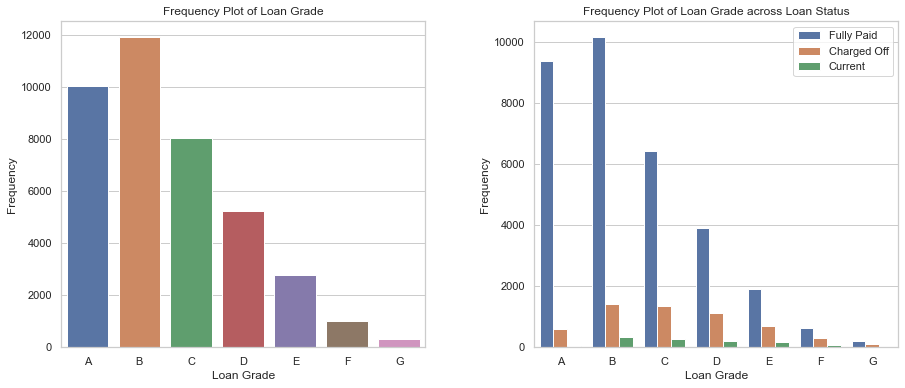

In [49]:
plot_univariate(category = 'Categorical',
               plot_type = 'Ordered Categorical',
               series = series,
               figsize_x = 15,
               figsize_y = 6,
               subplot_x = 1,
               subplot_y = 2,
               xlabel = "Loan Grade",
               ylabel = "Frequency",
               x_axis = 'grade',
               hue = 'loan_status',
               data = fd,
               legend = 'best',
               hspace = 0,
               wspace = 0.3,
               xlabel_rotation = 0)

### According to above graph we can say that B,C,D Grade have more number of Charged off

### Rank- Frequency plot of Ordered Categorical Variable : sub_grade

In [50]:
series = fd.sub_grade.value_counts(dropna = False)
print(series.sort_index())
print('\n')


A1    1132
A2    1499
A3    1798
A4    2867
A5    2721
B1    1818
B2    2034
B3    2884
B4    2498
B5    2689
C1    2113
C2    1992
C3    1510
C4    1229
C5    1171
D1     923
D2    1330
D3    1159
D4     970
D5     862
E1     752
E2     646
E3     542
E4     447
E5     399
F1     322
F2     247
F3     179
F4     165
F5     112
G1     102
G2      75
G3      47
G4      53
G5      29
Name: sub_grade, dtype: int64




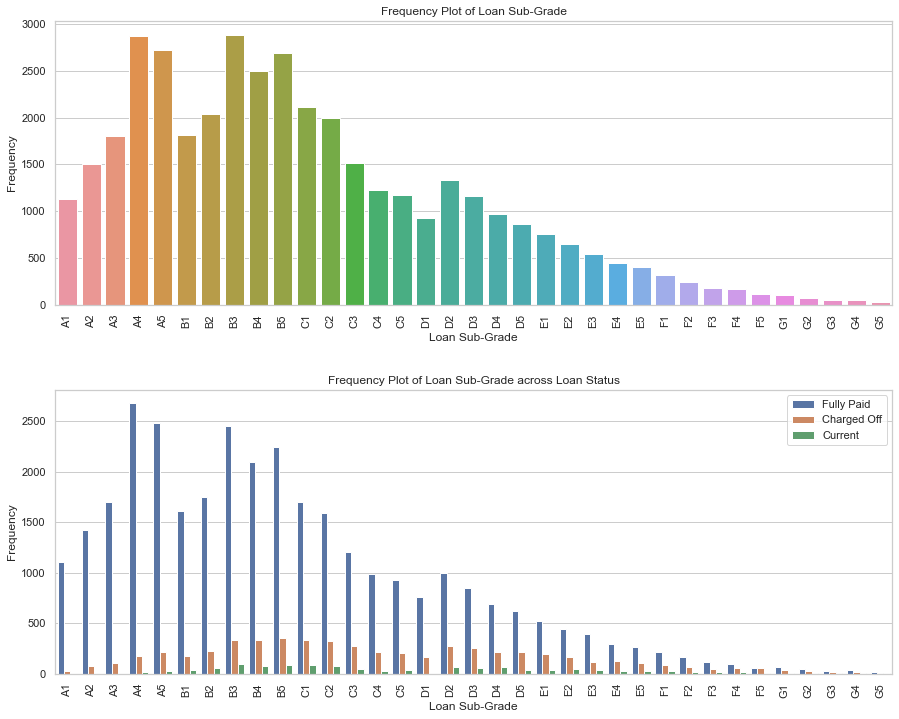

In [51]:
plot_univariate(category = 'Categorical',
               plot_type = 'Ordered Categorical',
               series = series,
               figsize_x = 15,
               figsize_y = 12,
               subplot_x = 2,
               subplot_y = 1,
               xlabel = "Loan Sub-Grade",
               ylabel = "Frequency",
               x_axis = 'sub_grade',
               hue = 'loan_status',
               data = fd,
               legend = 'best',
               hspace = 0.3,
               wspace = 0,
               xlabel_rotation = 90)

### According to the above plot we can say that in Grade B,C and D most of the Charged off applicants belong to Sub Grades:
1) Grade B => B3,B5,B4  
2) Grade C => C1,C2,C3  
3) Grade D => D2,D3,D4  


### Rank- Frequency plot of Ordered Categorical Variable : emp_length

In [52]:
series = fd.emp_length.value_counts(dropna = False)
print(series.sort_index())
print('\n')


1 year       3213
10+ years    8740
2 years      4342
3 years      4059
4 years      3410
5 years      3254
6 years      2209
7 years      1759
8 years      1462
9 years      1247
< 1 year     4551
NaN          1070
Name: emp_length, dtype: int64




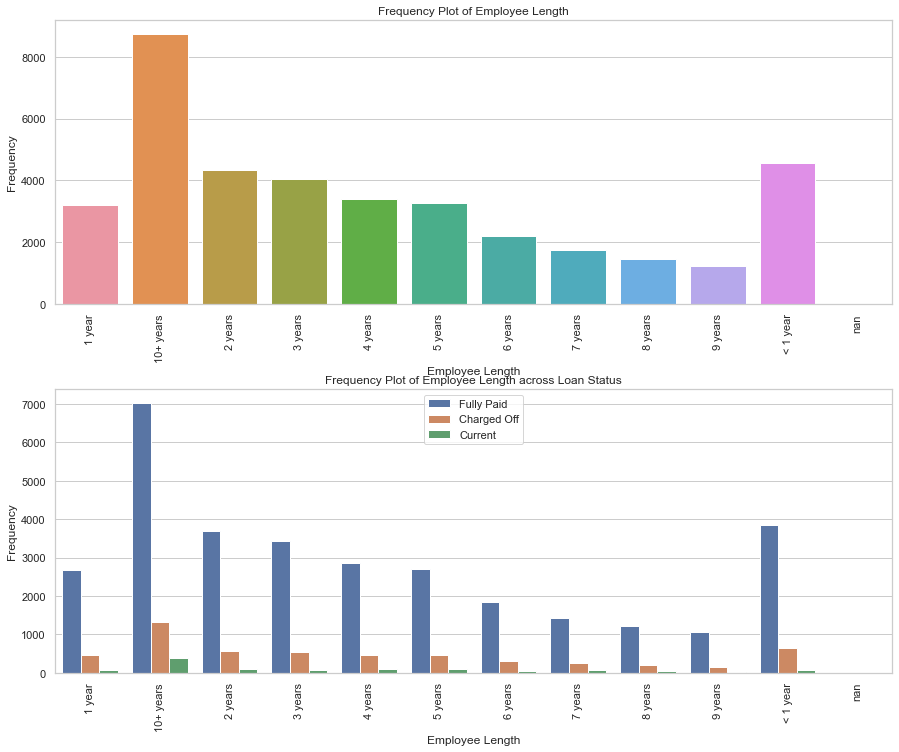

In [53]:
plot_univariate(category = 'Categorical',
               plot_type = 'Ordered Categorical',
               series = series,
               figsize_x = 15,
               figsize_y = 12,
               subplot_x = 2,
               subplot_y = 1,
               xlabel = "Employee Length",
               ylabel = "Frequency",
               x_axis = 'emp_length',
               hue = 'loan_status',
               data = fd,
               legend = 'best',
               hspace = 0.3,
               wspace = 0,
               xlabel_rotation = 90)

### According to above graph, most of the charged Off borrowers has employement length :
1) 10+ years  
2) <1 Years  

### Rank- Frequency plot of Ordered Categorical Variable : issue_yr

In [54]:
series = fd.issue_yr.value_counts(dropna = False)
print(series.sort_index())
print('\n')


2007      245
2008     1551
2009     4663
2010    11413
2011    21444
Name: issue_yr, dtype: int64




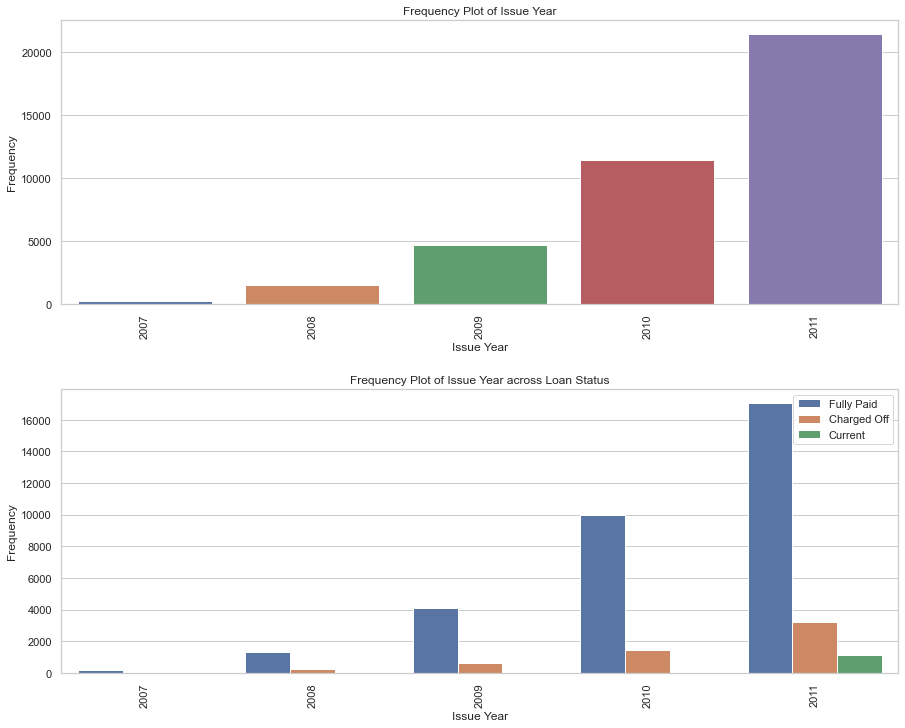

In [55]:
plot_univariate(category = 'Categorical',
               plot_type = 'Ordered Categorical',
               series = series,
               figsize_x = 15,
               figsize_y = 12,
               subplot_x = 2,
               subplot_y = 1,
               xlabel = "Issue Year",
               ylabel = "Frequency",
               x_axis = 'issue_yr',
               hue = 'loan_status',
               data = fd,
               legend = 'best',
               hspace = 0.3,
               wspace = 0,
               xlabel_rotation = 90)

### According to above graph Charged Off applicants are more in the loan issued year 2011

## Quantitative or Continous Variable are :
1) funded_amnt  
2) int_rate    
3) installment  
4) annual_inc  
5) dti  

In [62]:
# setting the loan status order list
order_list = ['Charged Off','Current','Fully paid']

In [63]:
fd.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,issue_yr
0,5000,5000,4975.0000,36 months,10.6500,162.8700,B,B2,NaN,10+ years,RENT,24000.0000,Dec-11,Fully Paid,credit_card,AZ,27.6500,0,Jan-85,1,3,0,83.70%,9,0.0000,0.0000,5863.1552,5833.8400,Jan-15,May-16,0.0000,2011
1,2500,2500,2500.0000,60 months,15.2700,59.8300,C,C4,Ryder,< 1 year,RENT,30000.0000,Dec-11,Charged Off,car,GA,1.0000,0,Apr-99,5,3,0,9.40%,4,0.0000,0.0000,1008.7100,1008.7100,Apr-13,Sep-13,0.0000,2011
2,2400,2400,2400.0000,36 months,15.9600,84.3300,C,C5,NaN,10+ years,RENT,12252.0000,Dec-11,Fully Paid,small_business,IL,8.7200,0,Nov-01,2,2,0,98.50%,10,0.0000,0.0000,3005.6668,3005.6700,Jun-14,May-16,0.0000,2011
3,10000,10000,10000.0000,36 months,13.4900,339.3100,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0000,Dec-11,Fully Paid,other,CA,20.0000,0,Feb-96,1,10,0,21%,37,0.0000,0.0000,12231.8900,12231.8900,Jan-15,Apr-16,0.0000,2011
4,3000,3000,3000.0000,60 months,12.6900,67.7900,B,B5,University Medical Group,1 year,RENT,80000.0000,Dec-11,Current,other,OR,17.9400,0,Jan-96,0,15,0,53.90%,38,524.0600,524.0600,3513.3300,3513.3300,May-16,May-16,0.0000,2011


count   39316.0000
mean      322.0288
std       206.2084
min        15.6900
25%       166.2125
50%       278.9400
75%       426.1000
max      1305.1900
Name: installment, dtype: float64


                 count     mean      std     min      25%      50%      75%       max
loan_status                                                                          
Charged Off  5584.0000 334.2772 215.3098 22.7900 168.4500 292.0350 454.3750 1305.1900
Current      1126.0000 392.6293 202.7272 21.7400 257.3000 367.2900 518.2175  981.4500
Fully Paid  32606.0000 317.4931 204.2017 15.6900 164.8500 273.7600 415.9500 1288.1000




C:\Users\shivam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


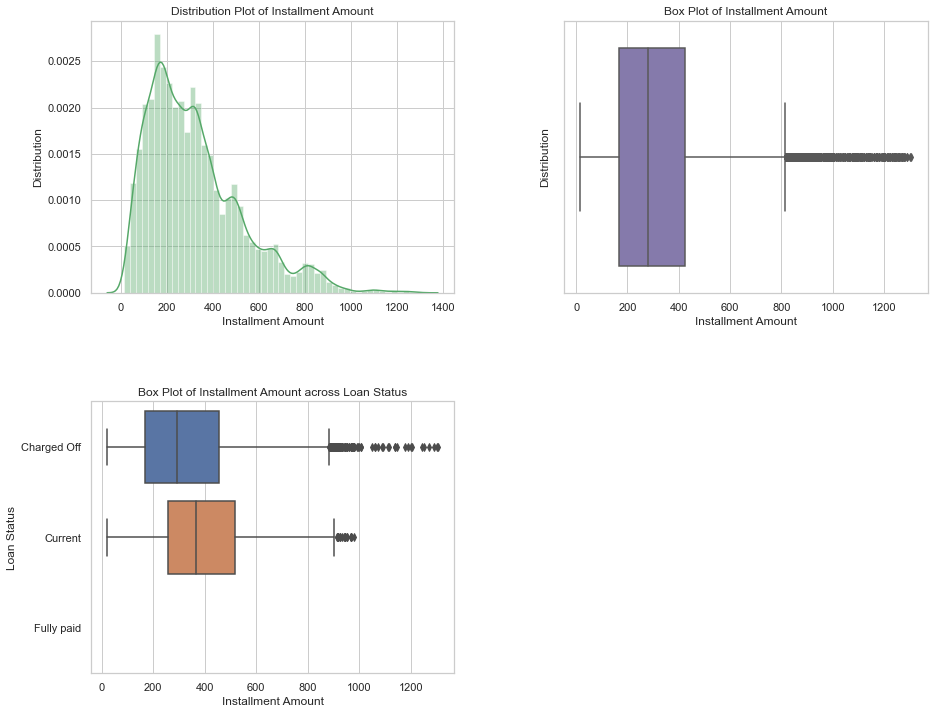

In [64]:
print(fd.installment.describe())
print('\n')
print(fd.groupby(by = 'loan_status').installment.describe())
print('\n')

# Call Custom Function
plot_univariate(category = 'Continuous',
                plot_type = 'Quantitative',
                series = order_list,
                figsize_x = 15,
                figsize_y = 12,
                subplot_x = 2,
                subplot_y = 2,
                xlabel = "Installment Amount",
                ylabel = "Distribution",
                x_axis = 'installment',
                hue = 'loan_status',
                data = fd,
                legend = 'best',
                hspace = 0.4,
                wspace = 0.3,
                xlabel_rotation = 0)

count    39316.0000
mean     65523.0553
std      35215.0501
min       4000.0000
25%      40000.0000
50%      58000.0000
75%      81000.0000
max     234996.0000
Name: annual_inc, dtype: float64


                 count       mean        std       min        25%        50%        75%         max
loan_status                                                                                        
Charged Off  5584.0000 59840.8761 32833.5891 4080.0000 37000.0000 52800.0000 74879.0000 230000.0000
Current      1126.0000 72366.7515 36051.2511 9960.0000 47000.0000 64695.0000 89000.0000 215000.0000
Fully Paid  32606.0000 66259.8303 35470.8144 4000.0000 41000.0000 60000.0000 82403.0000 234996.0000




C:\Users\shivam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


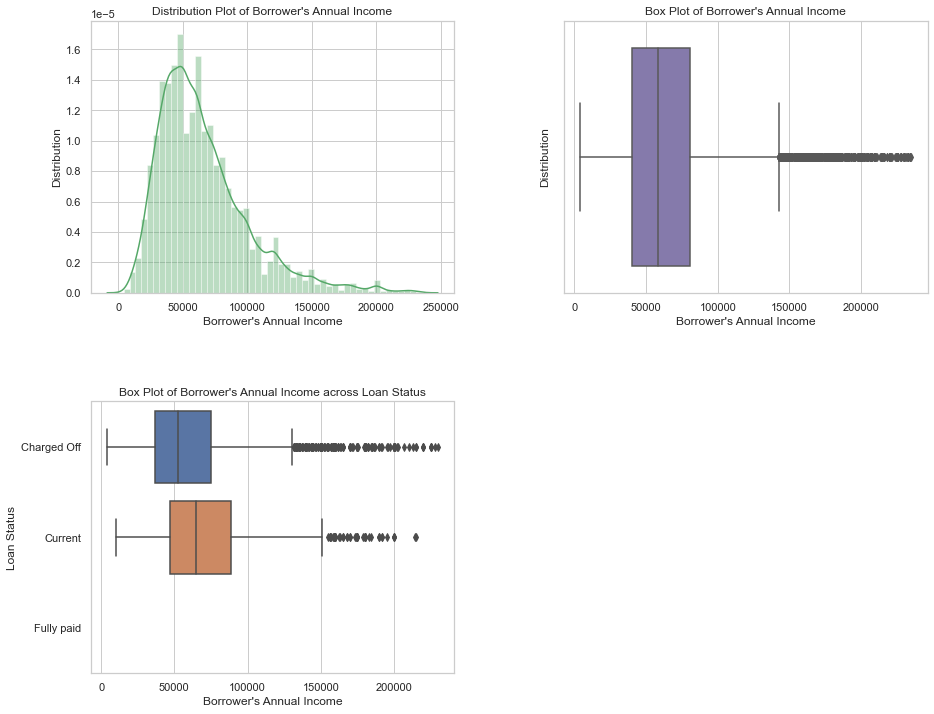

In [65]:
# 4.13 Distribution and Box Plots of Quantitative Variable: annual_inc

print(fd.annual_inc.describe())
print('\n')
print(fd.groupby(by = 'loan_status').annual_inc.describe())
print('\n')

# Call Custom Function
plot_univariate(category = 'Continuous',
                plot_type = 'Quantitative',
                series = order_list,
                figsize_x = 15,
                figsize_y = 12,
                subplot_x = 2,
                subplot_y = 2,
                xlabel = "Borrower's Annual Income",
                ylabel = "Distribution",
                x_axis = 'annual_inc',
                hue = 'loan_status',
                data = fd,
                legend = 'best',
                hspace = 0.4,
                wspace = 0.3,
                xlabel_rotation = 0)

count   39316.0000
mean       13.3767
std         6.6633
min         0.0000
25%         8.2700
50%        13.4800
75%        18.6400
max        29.9900
Name: dti, dtype: float64


                 count    mean    std    min    25%     50%     75%     max
loan_status                                                                
Charged Off  5584.0000 14.0450 6.5705 0.0000 9.1275 14.3400 19.3100 29.8500
Current      1126.0000 14.8388 6.6862 0.0000 9.8875 15.1050 20.1050 29.9500
Fully Paid  32606.0000 13.2118 6.6651 0.0000 8.0600 13.2700 18.4500 29.9900




C:\Users\shivam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


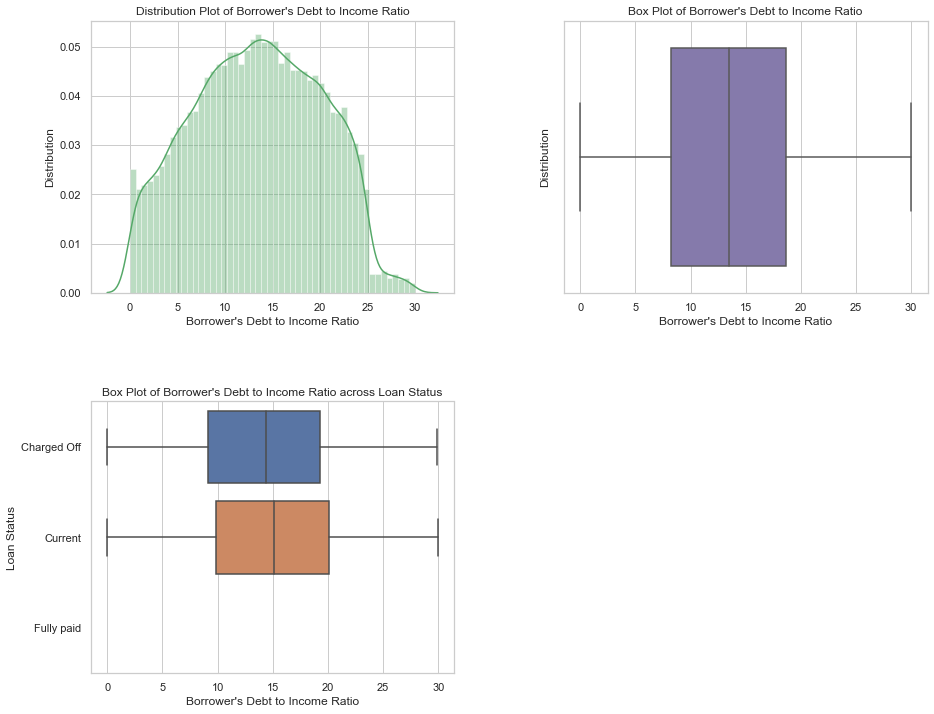

In [66]:
# 4.14 Distribution and Box Plots of Quantitative Variable: dti

print(fd.dti.describe())
print('\n')
print(fd.groupby(by = 'loan_status').dti.describe())
print('\n')

# Call Custom Function
plot_univariate(category = 'Continuous',
                plot_type = 'Quantitative',
                series = order_list,
                figsize_x = 15,
                figsize_y = 12,
                subplot_x = 2,
                subplot_y = 2,
                xlabel = "Borrower's Debt to Income Ratio",
                ylabel = "Distribution",
                x_axis = 'dti',
                hue = 'loan_status',
                data = fd,
                legend = 'best',
                hspace = 0.4,
                wspace = 0.3,
                xlabel_rotation = 0)

## 5. Bivariate Analysis
Bivariate Analysis: Categorical Variables
  Categorical Variables are:

    1. home_ownership
    2. purpose
    3. addr_state
    4. term
    5. grade
    6. sub_grade
    7. emp_length
    8. issue_yr
    9. funded_amnt
   10. int_rate_percent
   11. annual_inc
   12. installment
   13. dti

In [67]:
# Custom Function for Bivariate Analysis

# Function Parameters   -

# figsize_x             -      The width of the plot figure in inches.
# figsize_y             -      The height of the plot figure in inches.
# subplot_x             -      The rows for the subplot.
# subplot_y             -      The columns for the subplot.
# xlabel                -      The x-axis label for the plot.
# ylabel                -      The y-axis label for the plot.
# x_axis                -      The series/variable to be plotted along the x-axis.
# y_axis                -      The series/variable to be plotted along the y-axis.

# hspace                -      The amount of height reserved for space between subplots,
#                              expressed as a fraction of the average axis height

# wspace                -      The amount of width reserved for space between subplots,
#                              expressed as a fraction of the average axis width

# xlabel_rotation       -      The degree of rotation for the x-axis ticks (values).
def plot_bivariate(figsize_x, figsize_y, subplot_x, subplot_y, xlabel, ylabel, 
                   x_axis, y_axis, hspace, wspace, xlabel_rotation):
    
    legend = 'best'
    
    plt.figure(figsize = (figsize_x, figsize_y))
    
    # Subplot - 1
    plt.subplot(subplot_x, subplot_y, 1)
    
    sns.lineplot(data = y_axis, estimator = np.median, color = 'darkblue')
    # Call Custom Function
    title = "Line Plot - " + xlabel
    set_plotting_variable(title, xlabel, ylabel, xlabel_rotation, False, legend)
    
    # Subplot - 2
    plt.subplot(subplot_x, subplot_y, 2)
    
    sns.barplot(x = x_axis, y = y_axis, estimator = np.median, palette = 'rainbow')
    # Call Custom Function
    title = "Bar Plot - " + xlabel
    set_plotting_variable(title, xlabel, ylabel, xlabel_rotation, False, legend)
    
    # Subplot - 3
    plt.subplot(subplot_x, subplot_y, 3)
    
    sns.lineplot(data = y_axis, estimator = np.median, color = 'maroon')
    sns.barplot(x = x_axis, y = y_axis, estimator = np.median, palette = 'rainbow')
    # Call Custom Function
    title = "Joint Plot - " + xlabel
    set_plotting_variable(title, xlabel, ylabel, xlabel_rotation, False, legend)
    
    plt.subplots_adjust(hspace = hspace)
    plt.subplots_adjust(wspace = wspace)
    plt.show()

loan_status     Charged Off  Current  Fully Paid  Total  Charged Off Rate
home_ownership                                                           
OTHER                    18        0          78     96           18.7500
RENT                   2824      416       15573  18813           15.0109
OWN                     440       82        2507   3029           14.5262
MORTGAGE               2302      628       14448  17378           13.2466


loan_status  Charged Off  Current  Fully Paid      Total  Charged Off Rate
count             4.0000   4.0000      4.0000     4.0000            4.0000
mean           1396.0000 281.5000   8151.5000  9829.0000           15.3834
std            1375.1170 292.7997   7995.1310  9637.9622            2.3646
min              18.0000   0.0000     78.0000    96.0000           13.2466
25%             334.5000  61.5000   1899.7500  2295.7500           14.2063
50%            1371.0000 249.0000   8477.5000 10203.5000           14.7685
75%            2432.5000 469.

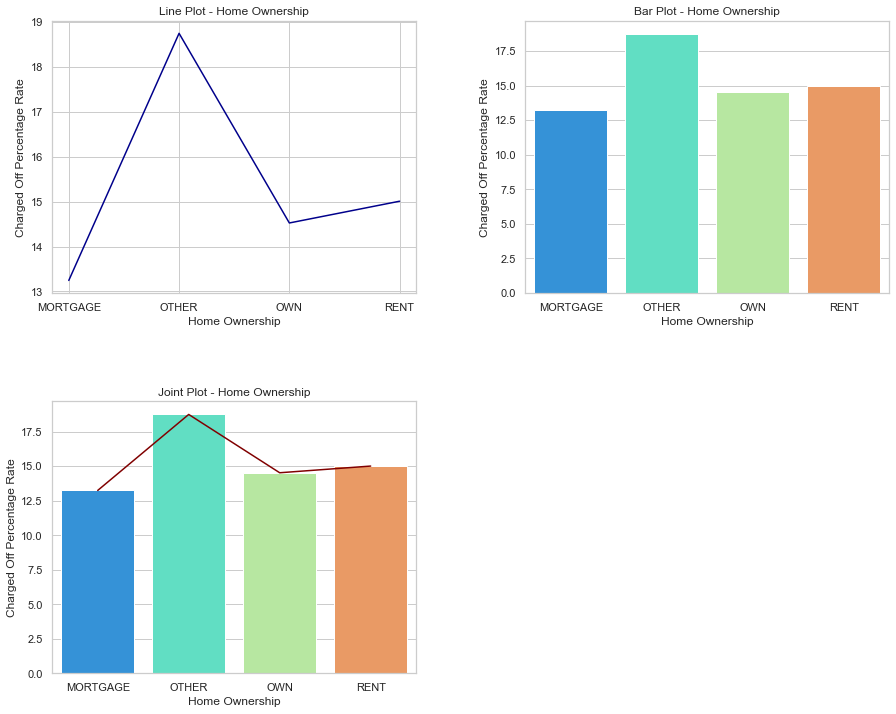

In [68]:
# 5.1 Categorical Variable Analysis: home_ownership against Charged Off Percentage Rate

df = fd.pivot_table(values = 'funded_amnt',
                      index = 'home_ownership',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))

print(df.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df.iloc[0:-1].describe())
print('\n')

xdata = df.iloc[0:-1].index
ydata = df.iloc[0:-1]['Charged Off Rate']

# Call Custom Function
plot_bivariate(figsize_x = 15,
               figsize_y = 12,
               subplot_x = 2,
               subplot_y = 2,
               xlabel = "Home Ownership",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               hspace = 0.4,
               wspace = 0.3,
               xlabel_rotation = 0)

## According to the above plot we can say that the Charged Off Rate of Top 3 Borrower's Home Ownership are:
1. OTHER  = 18.75%
2. RENT   = 15.01%
3. OWN    = 14.53%

loan_status         Charged Off  Current  Fully Paid  Total  Charged Off Rate
purpose                                                                      
small_business              472       74        1251   1797           26.2660
renewable_energy             19        1          81    101           18.8119
educational                  55        0         268    323           17.0279
other                       629      126        3201   3956           15.8999
moving                       91        7         479    577           15.7712
house                        58       14         299    371           15.6334
medical                     106       12         568    686           15.4519
debt_consolidation         2752      580       15164  18496           14.8789
vacation                     53        6         322    381           13.9108
home_improvement            338       97        2459   2894           11.6793
credit_card                 537      102        4450   5089     

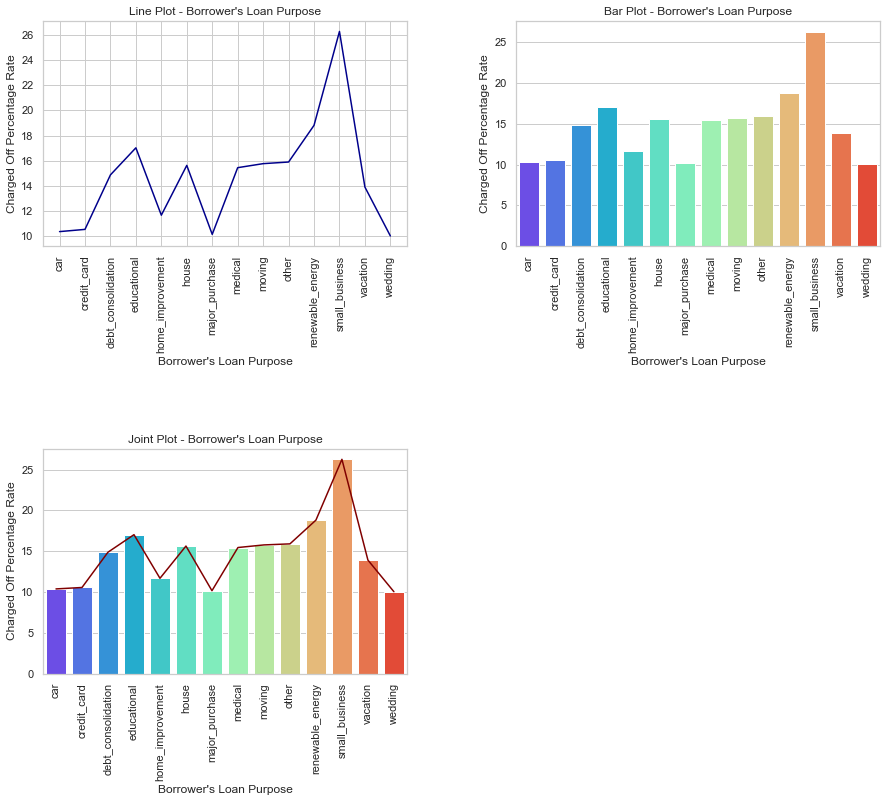

In [69]:
# 5.2 Categorical Variable Analysis: purpose against Charged Off Percentage Rate

df = fd.pivot_table(values = 'funded_amnt',
                      index = 'purpose',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')
df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))

print(df.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df.iloc[0:-1].describe())
print('\n')

xdata = df.iloc[0:-1].index
ydata = df.iloc[0:-1]['Charged Off Rate']

# Call Custom Function
plot_bivariate(figsize_x = 15,
               figsize_y = 12,
               subplot_x = 2,
               subplot_y = 2,
               xlabel = "Borrower's Loan Purpose",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               hspace = 0.9,
               wspace = 0.3,
               xlabel_rotation = 90)

## Charged Off Rate - Top 3 Borrower's Purpose:
1. small_business    = 26.27%
2. renewable_energy  = 18.81%
3. educational       = 17.03%

loan_status  Charged Off  Current  Fully Paid  Total  Charged Off Rate
addr_state                                                            
NE                     3        0           2      5           60.0000
NV                   107       17         368    492           21.7480
SD                    12        2          50     64           18.7500
AK                    14        2          63     79           17.7215
FL                   497       85        2252   2834           17.5371
MO                   114       16         551    681           16.7401
ID                     1        0           5      6           16.6667
NM                    30        5         149    184           16.3043
HI                    28        8         138    174           16.0920
CA                  1116      149        5766   7031           15.8726
OR                    71       16         364    451           15.7428
UT                    40        6         211    257           15.5642
MD    

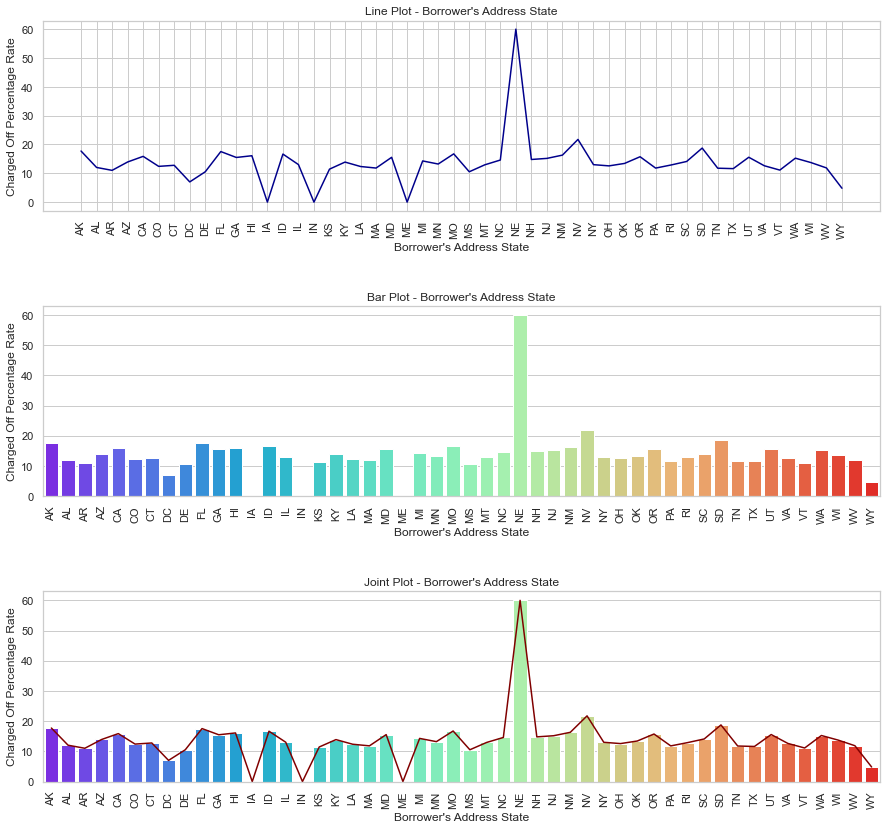

In [108]:
# 5.3 Categorical Variable Analysis: addr_state against Charged Off Percentage Rate

df_addr_state = loan.pivot_table(values = 'funded_amnt',
                      index = 'addr_state',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df_addr_state['Charged Off Rate'] = 100*(round((df_addr_state['Charged Off']/df_addr_state['Total']), 6))

print(df_addr_state.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')

xdata = df_addr_state.iloc[0:-1].index
ydata = df_addr_state.iloc[0:-1]['Charged Off Rate']

# Call Custom Function
plot_bivariate(figsize_x = 15,
               figsize_y = 14,
               subplot_x = 3,
               subplot_y = 1,
               xlabel = "Borrower's Address State",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               hspace = 0.5,
               wspace = 0.3,
               xlabel_rotation = 90)

## According to the above plot we can say that the Charged Off Rate of Top 5 Borrower's Address State are:
1. NE (Nebraska)     = 60.00%
2. NV (Nevada)       = 21.75%
3. SD (South Dakota) = 18.75%
4. AK (Alaska)       = 17.72%
5. FL (Florida)      = 17.54%

*NE (Nebraska) has a total of 5 loans out of which 3 were charged-off.

In [70]:
# 5.4 Categorical Variable Analysis: term against Charged Off Percentage Rate

df = fd.pivot_table(values = 'funded_amnt',
                      index = 'term',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))

print(df.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df.iloc[0:-1].describe())
print('\n')

xdata = df.iloc[0:-1].index
ydata = df.iloc[0:-1]['Charged Off Rate']

loan_status  Charged Off  Current  Fully Paid  Total  Charged Off Rate
term                                                                  
 60 months          2383     1126        6990  10499           22.6974
 36 months          3201        0       25616  28817           11.1080


loan_status  Charged Off   Current  Fully Paid      Total  Charged Off Rate
count             2.0000    2.0000      2.0000     2.0000            2.0000
mean           2792.0000  563.0000  16303.0000 19658.0000           16.9027
std             578.4133  796.2022  13170.5709 12952.7820            8.1949
min            2383.0000    0.0000   6990.0000 10499.0000           11.1080
25%            2587.5000  281.5000  11646.5000 15078.5000           14.0053
50%            2792.0000  563.0000  16303.0000 19658.0000           16.9027
75%            2996.5000  844.5000  20959.5000 24237.5000           19.8001
max            3201.0000 1126.0000  25616.0000 28817.0000           22.6974




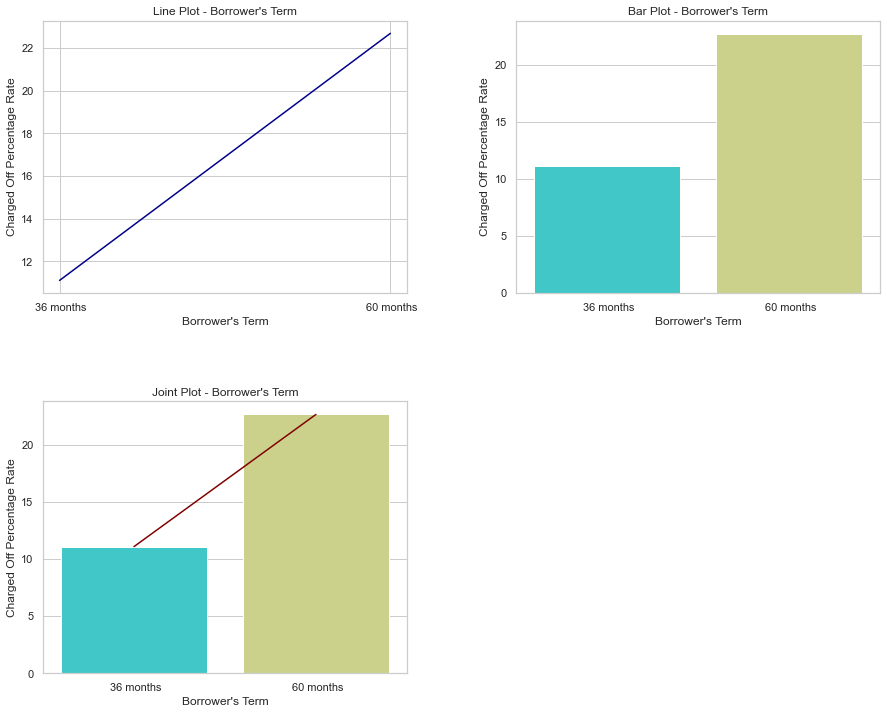

In [110]:
# Call Custom Function
plot_bivariate(figsize_x = 15,
               figsize_y = 12,
               subplot_x = 2,
               subplot_y = 2,
               xlabel = "Borrower's Term",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               hspace = 0.4,
               wspace = 0.3,
               xlabel_rotation = 0)

## According to the above plot we can say that the Charged Off Rate of Borrower's Top Loan Term are:
1. 60 months   = 22.70%

loan_status  Charged Off  Current  Fully Paid  Total  Charged Off Rate
grade                                                                 
G                     99       17         190    306           32.3529
F                    312       71         642   1025           30.4390
E                    704      176        1906   2786           25.2692
D                   1112      216        3916   5244           21.2052
C                   1342      262        6411   8015           16.7436
B                   1414      344       10165  11923           11.8594
A                    601       40        9376  10017            5.9998


loan_status  Charged Off  Current  Fully Paid      Total  Charged Off Rate
count             7.0000   7.0000      7.0000     7.0000            7.0000
mean            797.7143 160.8571   4658.0000  5616.5714           20.5527
std             507.6793 122.7578   4079.9291  4515.2134            9.6741
min              99.0000  17.0000    190.0000   306.0000   

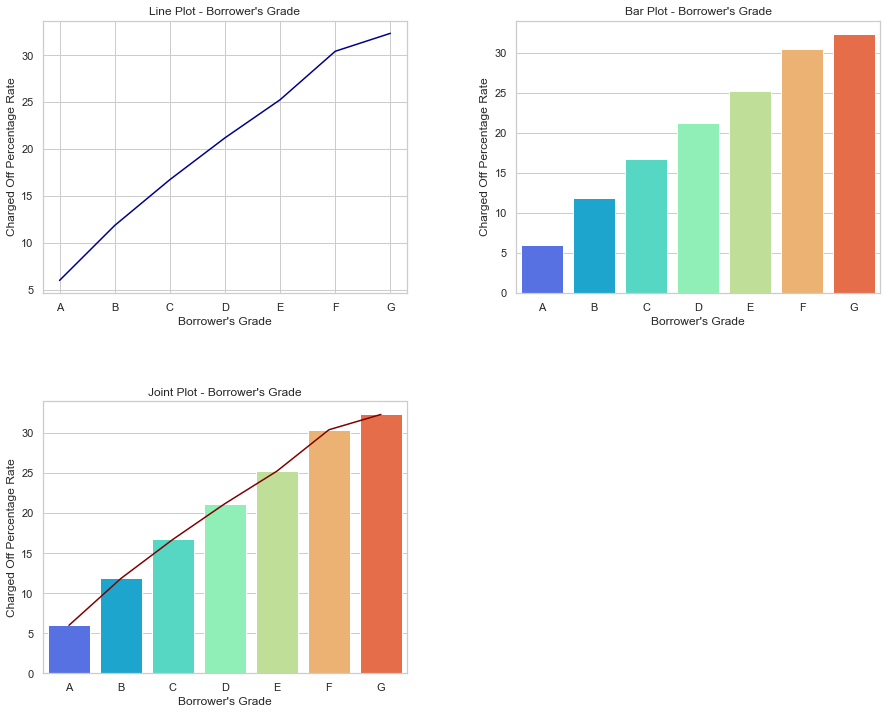

In [71]:
# 5.5 Categorical Variable Analysis: grade against Charged Off Percentage Rate

df = fd.pivot_table(values = 'funded_amnt',
                      index = 'grade',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))

print(df.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df.iloc[0:-1].describe())
print('\n')

xdata = df.iloc[0:-1].index
ydata = df.iloc[0:-1]['Charged Off Rate']

# Call Custom Function
plot_bivariate(figsize_x = 15,
               figsize_y = 12,
               subplot_x = 2,
               subplot_y = 2,
               xlabel = "Borrower's Grade",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               hspace = 0.4,
               wspace = 0.3,
               xlabel_rotation = 0)

## Charged Off Rate - Grade:
As the Grade increases, Charged Off Rate increases. Top Order:

    1. G
    2. F
    3. E
    4. D
    5. C
    6. B
    7. A

loan_status      Charged Off  Current  Fully Paid  Total  Charged Off Rate
grade sub_grade                                                           
G     G5                  10        1          18     29           34.4828
      G4                  12        2          39     53           22.6415
      G3                  19        3          25     47           40.4255
      G2                  27        1          47     75           36.0000
      G1                  31       10          61    102           30.3922
F     F5                  53        4          55    112           47.3214
      F4                  52       17          96    165           31.5152
      F3                  50       11         118    179           27.9330
      F2                  69       16         162    247           27.9352
      F1                  88       23         211    322           27.3292
E     E5                 106       29         264    399           26.5664
      E4                 

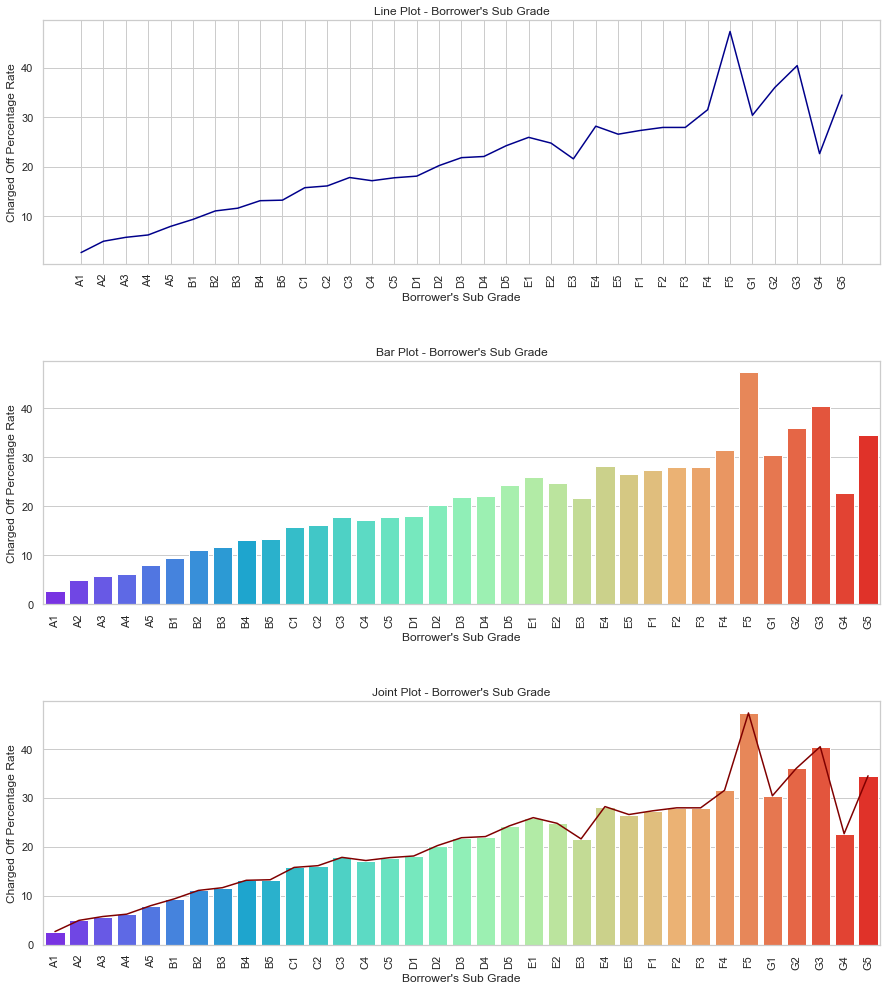

In [112]:
# 5.6 Categorical Variable Analysis: sub_grade against Charged Off Percentage Rate

df = loan.pivot_table(values = 'funded_amnt',
                      index = 'sub_grade',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))

df_sub_grade = loan.pivot_table(values = 'funded_amnt',
                                index = ['grade', 'sub_grade'],
                                columns = 'loan_status',
                                aggfunc = np.count_nonzero,
                                fill_value = 0,
                                margins = True,
                                margins_name = 'Total')

df_sub_grade['Charged Off Rate'] = 100*(round((df_sub_grade['Charged Off']/df_sub_grade['Total']), 6))

print(df_sub_grade.iloc[0:-1].sort_values(by = ['grade', 'sub_grade', 'Charged Off Rate'], ascending = False))
print('\n')
#print(df_sub_grade.iloc[0:-1].describe())
#print('\n')

xdata = df.iloc[0:-1].index
ydata = df.iloc[0:-1]['Charged Off Rate']
# Call Custom Function
plot_bivariate(figsize_x = 15,
               figsize_y = 17,
               subplot_x = 3,
               subplot_y = 1,
               xlabel = "Borrower's Sub Grade",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               hspace = 0.4,
               wspace = 0.3,
               xlabel_rotation = 90)

## According to the above plot we can say that the Charged Off Rate of Sub Grade are:
As the Grade and the Sub Grades increases, Charged Off Rate increases. Top Order:

    1. G
    2. F
    3. E
    4. D
    5. C
    6. B
    7. A

loan_status  Charged Off  Current  Fully Paid  Total  Charged Off Rate
emp_length                                                            
10+ years           1316      386        7038   8740           15.0572
7 years              262       62        1435   1759           14.8948
1 year               455       69        2689   3213           14.1612
5 years              456       87        2711   3254           14.0135
< 1 year             635       74        3842   4551           13.9530
8 years              203       43        1216   1462           13.8851
6 years              305       58        1846   2209           13.8072
3 years              551       82        3426   4059           13.5748
4 years              456       94        2860   3410           13.3724
2 years              561       97        3684   4342           12.9203
9 years              157       32        1058   1247           12.5902


loan_status  Charged Off  Current  Fully Paid     Total  Charged Off Rate
c

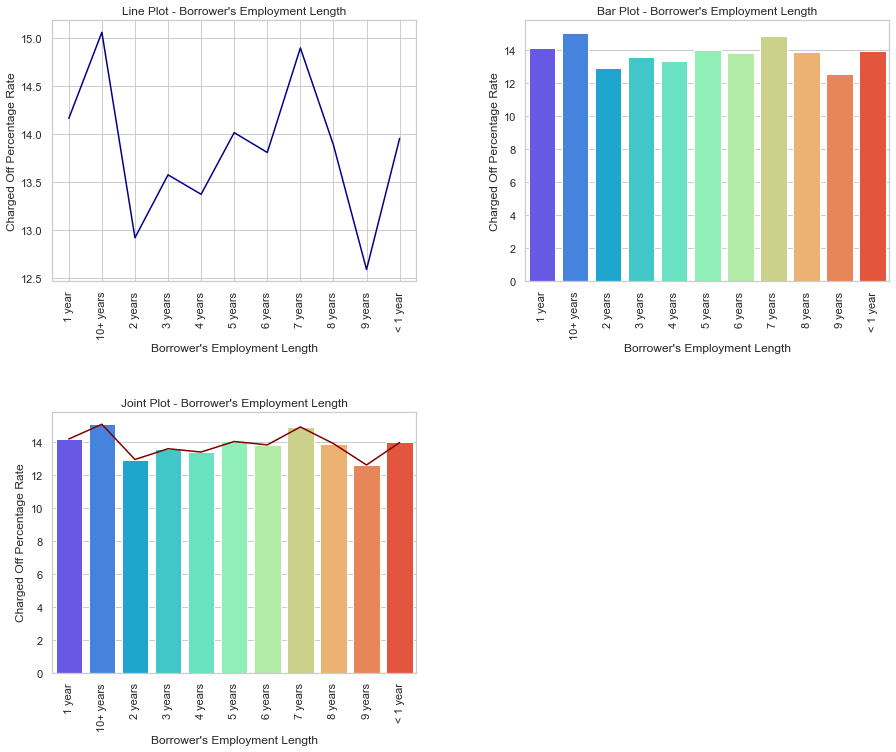

In [72]:
# 5.7 Categorical Variable Analysis: emp_length against Charged Off Percentage Rate

df = fd.pivot_table(values = 'funded_amnt',
                      index = 'emp_length',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))

print(df.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df.iloc[0:-1].describe())
print('\n')

xdata = df.iloc[0:-1].index
ydata = df.iloc[0:-1]['Charged Off Rate']
# Call Custom Function
plot_bivariate(figsize_x = 15,
               figsize_y = 12,
               subplot_x = 2,
               subplot_y = 2,
               xlabel = "Borrower's Employment Length",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               hspace = 0.5,
               wspace = 0.3,
               xlabel_rotation = 90)

## According to the above plot we can say that the Charged Off Rate of Employment Length are:
Here 10 years means >10 years experience and 0 year mean <1 year experience. Now >10 years doesn't give a definite year. Any values (11, 12, 13, ..., 20, 21, etc.) are possible and so we can definitely expect a high spike in that range as the spike is the combined rate of all charged off percentages more than 10. However, <1 year experience depicts only 1 value that is zero year experience or one who haven't completed 1 year. It can't be negative.

So, Top 3 employment length belonging to Charged Off category :
    1.  1 year
    2.  0 year (< 1 year)
    3. 10 Years (> 10 years)

loan_status  Charged Off  Current  Fully Paid  Total  Charged Off Rate
issue_yr                                                              
2007                  43        0         202    245           17.5510
2008                 246        0        1305   1551           15.8607
2011                3239     1126       17079  21444           15.1045
2010                1466        0        9947  11413           12.8450
2009                 590        0        4073   4663           12.6528


loan_status  Charged Off   Current  Fully Paid      Total  Charged Off Rate
count             5.0000    5.0000      5.0000     5.0000            5.0000
mean           1116.8000  225.2000   6521.2000  7863.2000           14.8028
std            1305.2328  503.5625   7006.0324  8734.4337            2.0747
min              43.0000    0.0000    202.0000   245.0000           12.6528
25%             246.0000    0.0000   1305.0000  1551.0000           12.8450
50%             590.0000    0.0000   4073.000

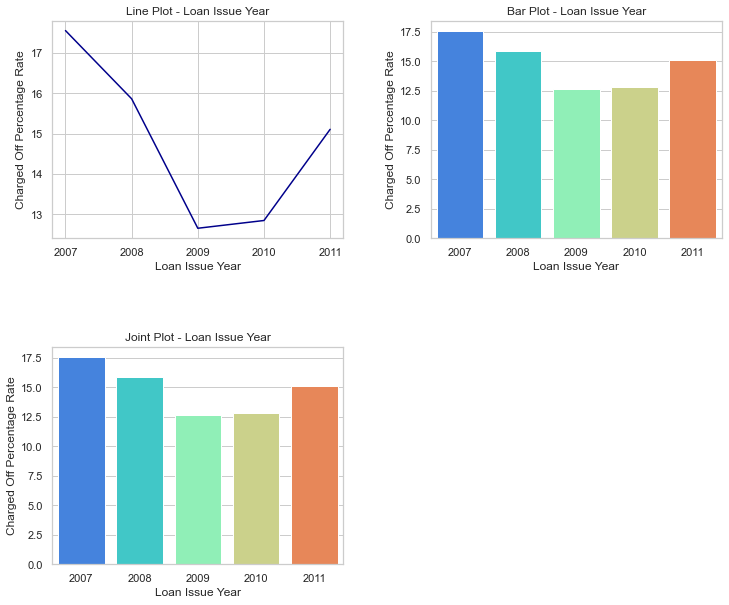

In [73]:
# 5.8 Categorical Variable Analysis: issue_yr against Charged Off Percentage Rate

df = fd.pivot_table(values = 'funded_amnt',
                      index = 'issue_yr',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))

print(df.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df.iloc[0:-1].describe())
print('\n')

xdata = df.iloc[0:-1].index
ydata = df.iloc[0:-1]['Charged Off Rate']

# Call Custom Function
plot_bivariate(figsize_x = 12,
               figsize_y = 10,
               subplot_x = 2,
               subplot_y = 2,
               xlabel = "Loan Issue Year",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               hspace = 0.5,
               wspace = 0.3,
               xlabel_rotation = 0)

## Looking into above plots, It can be said that the charged off percentage reduced from year 2007 to 2009 and then gradually increased from 2009 to 2011.

It is not adding any substantial inference to the Charged off Rate.

loan_status        Charged Off  Current  Fully Paid  Total  Charged Off Rate
funded_amnt_range                                                           
28000-35000                209      104         705   1018           20.5305
21000-28000                465      180        1933   2578           18.0372
14000-21000               1171      354        5735   7260           16.1295
7000-14000                1823      326       11680  13829           13.1824
0-7000                    1916      162       12553  14631           13.0955


loan_status  Charged Off  Current  Fully Paid      Total  Charged Off Rate
count             5.0000   5.0000      5.0000     5.0000            5.0000
mean           1116.8000 225.2000   6521.2000  7863.2000           16.1950
std             772.8714 108.9459   5442.7406  6255.9539            3.1968
min             209.0000 104.0000    705.0000  1018.0000           13.0955
25%             465.0000 162.0000   1933.0000  2578.0000           13.1824
50%      

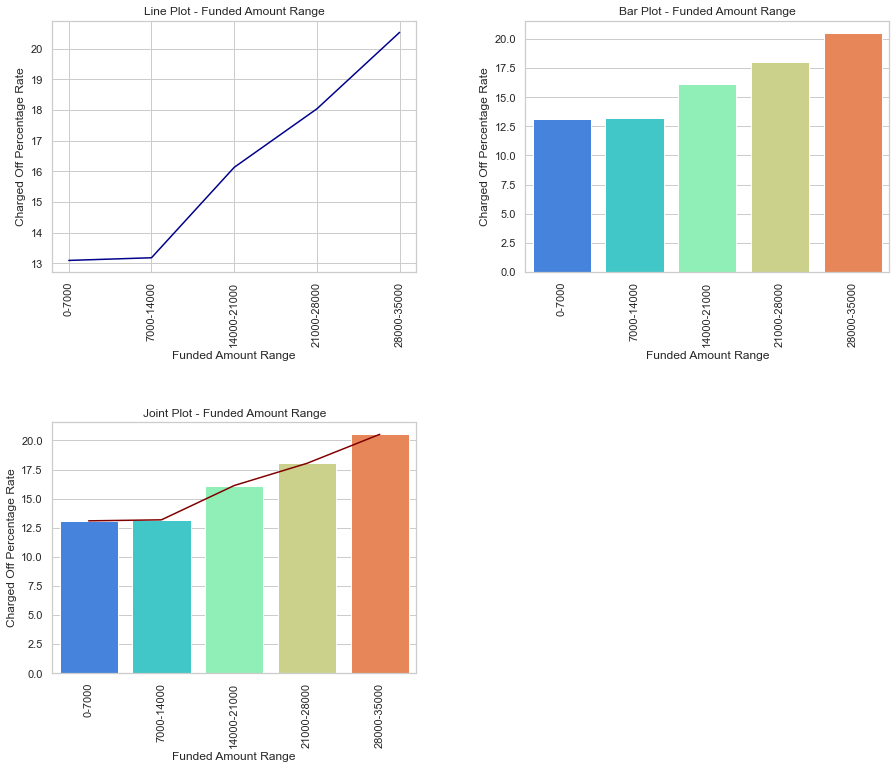

In [115]:
# 5.9 Categorical Variable Analysis: funded_amnt against Charged Off Percentage Rate

''' Funded Amount has lot of small chunks of data ranging from 0 to 35000. It would be very difficult to do Data 
    Analysis with this many variation. So, clubbing it into range or intervals.'''

bins = [0, 7000, 14000, 21000, 28000, 35000]

rng = ['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000-35000']

loan['funded_amnt_range'] = pd.cut(loan.funded_amnt, bins, labels = rng)

df = loan.pivot_table(values = 'funded_amnt',
                      index = 'funded_amnt_range',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0)

df['Total'] = df['Charged Off'] + df['Current'] + df['Fully Paid']

df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))

print(df.sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df.describe())
print('\n')

xdata = df.index
ydata = df['Charged Off Rate']

# Call Custom Function
plot_bivariate(figsize_x = 15,
               figsize_y = 12,
               subplot_x = 2,
               subplot_y = 2,
               xlabel = "Funded Amount Range",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               hspace = 0.6,
               wspace = 0.3,
               xlabel_rotation = 90)

## According to the above plot we can say that the Charged Off Rate of Top 3 Loan Funded Amount Range are:
1. 28000-35000   = 20.53%
2. 21000-28000   = 18.04%
3. 14000-21000   = 16.13%

## Apparently, as the Loan or Funded Amount increases, Charge Off Rate Increases

loan_status  Charged Off  Current  Fully Paid  Total  Charged Off Rate
int_rate                                                              
20-25                290      100         452    842           34.4418
15-20               1775      424        5350   7549           23.5130
10-15               2694      525       15404  18623           14.4660
5-10                 825       77       11400  12302            6.7062


loan_status  Charged Off  Current  Fully Paid      Total  Charged Off Rate
count             4.0000   4.0000      4.0000     4.0000            4.0000
mean           1396.0000 281.5000   8151.5000  9829.0000           19.7818
std            1061.0878 226.8340   6589.9472  7514.7573           11.9452
min             290.0000  77.0000    452.0000   842.0000            6.7062
25%             691.2500  94.2500   4125.5000  5872.2500           12.5261
50%            1300.0000 262.0000   8375.0000  9925.5000           18.9895
75%            2004.7500 449.2500  12401.0000 1

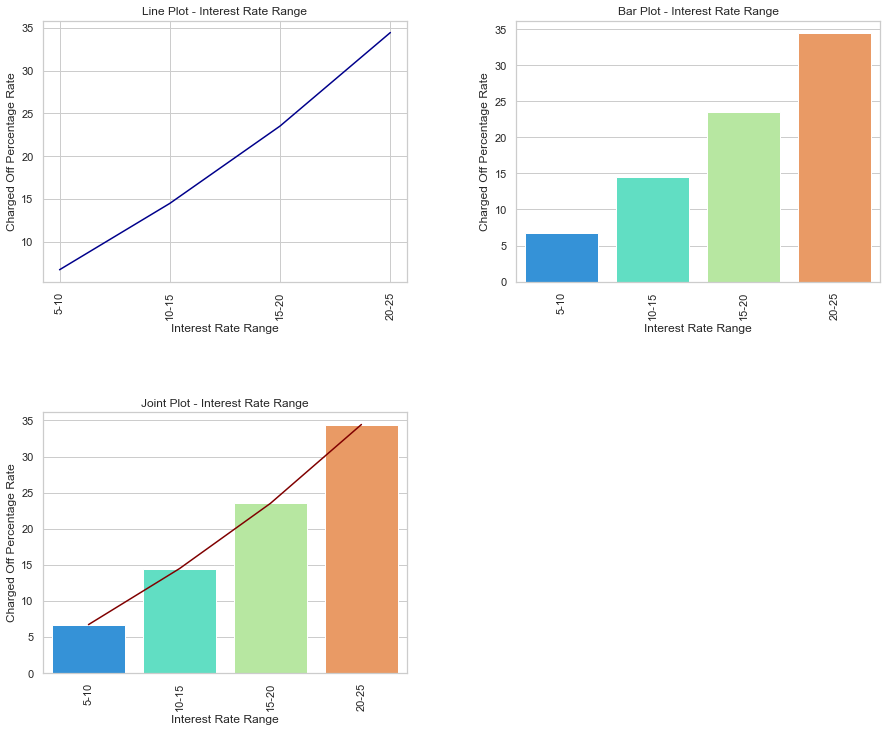

In [75]:
# 5.10 Categorical Variable Analysis: int_rate_percent against Charged Off Percentage Rate

''' Interest Rate has lot of small chunks of data ranging from 5% to 25%. It would be very difficult to do Data 
    Analysis with this many variations. So, clubbing it into range or intervals.'''

bins = [5, 10, 15, 20, 25]

rng = ['5-10', '10-15', '15-20', '20-25']

fd['int_rate'] = pd.cut(fd.int_rate, bins, labels = rng)

df = fd.pivot_table(values = 'funded_amnt',
                      index = 'int_rate',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0)

df['Total'] = df['Charged Off'] + df['Current'] + df['Fully Paid']

df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))

print(df.sort_values(by = 'Charged Off Rate', ascending = False))
print('\n')
print(df.describe())
print('\n')

xdata = df.index
ydata = df['Charged Off Rate']

# Call Custom Function
plot_bivariate(figsize_x = 15,
               figsize_y = 12,
               subplot_x = 2,
               subplot_y = 2,
               xlabel = "Interest Rate Range",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               hspace = 0.5,
               wspace = 0.3,
               xlabel_rotation = 90)

## According to the above plot we can say that the Charged Off Rate of Top 2 Interest Rate Range are:
1. 20-25   = 34.44%
2. 15-10   = 23.51%

Apparently, as the Interest Rate increases, Charge Off Rate Increases

loan_status     Charged Off  Current  Fully Paid  Total  Charged Off Rate
annual_inc_rng                                                           
0-20000                 237        9         943   1189           19.9327
20000-40000            1514      170        7003   8687           17.4283
40000-60000            1729      345        9534  11608           14.8949
60000-80000            1024      240        6597   7861           13.0263
80000-100000            531      170        3982   4683           11.3389
100000-120000           244       81        2083   2408           10.1329
120000-140000           137       39        1081   1257           10.8990
140000-160000            84       37         626    747           11.2450
160000-180000            36       23         348    407            8.8452
180000-200000            31       10         240    281           11.0320
200000-220000            11        2         104    117            9.4017
220000-240000             6        0  

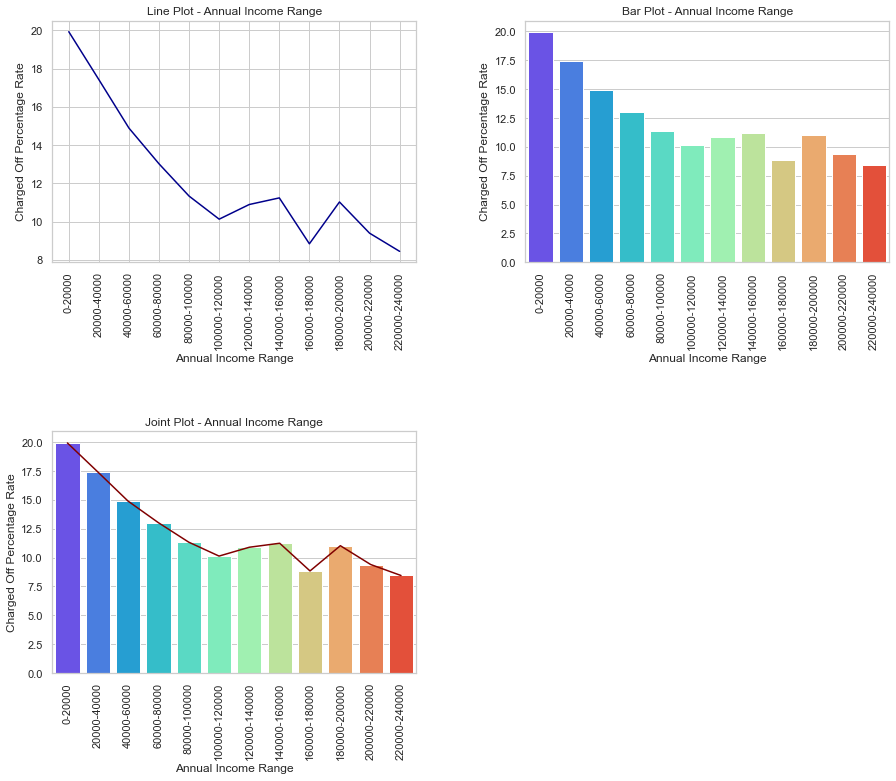

In [140]:
# 5.11 Categorical Variable Analysis: annual_inc against Charged Off Percentage Rate

''' Borrower's Annual Income has lot of small chunks of data ranging from 4000 to 234996. It would be very 
    difficult to perform Data Analysis with this many variations. So, clubbing it into range or intervals.
'''

bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000, 220000, 240000]

rng = ['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000-100000', '100000-120000',
       '120000-140000', '140000-160000', '160000-180000', '180000-200000', '200000-220000',
       '220000-240000']

loan['annual_inc_rng'] = pd.cut(loan.annual_inc, bins, labels = rng)

df = loan.pivot_table(values = 'funded_amnt',
                      index = 'annual_inc_rng',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0)

df['Total'] = df['Charged Off'] + df['Current'] + df['Fully Paid']

df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))

print(df)
print('\n')
print(df.describe())
print('\n')

xdata = df.index
ydata = df['Charged Off Rate']

# Call Custom Function
plot_bivariate(figsize_x = 15,
               figsize_y = 12,
               subplot_x = 2,
               subplot_y = 2,
               xlabel = "Annual Income Range",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               hspace = 0.7,
               wspace = 0.3,
               xlabel_rotation = 90)
              



## According to the above plot we can say that the Charged Off Rate of Top 3 Annual Income Range are:
1. 0-20000       = 19.93%
2. 20000-40000   = 17.43%
3. 40000-60000   = 14.90%

## So, as the Anual Income decreases, Charge Off Rate Increases

loan_status      Charged Off  Current  Fully Paid  Total  Charged Off Rate
installment_rng                                                           
0-200                   1808      207       11212  13227           13.6690
200-400                 2056      435       12597  15088           13.6267
400-600                 1036      310        5448   6794           15.2487
600-800                  423      132        2151   2706           15.6319
800-1000                 238       42        1013   1293           18.4068
1000-1200                 15        0         142    157            9.5541
1200-1400                  8        0          43     51           15.6863


loan_status  Charged Off  Current  Fully Paid      Total  Charged Off Rate
count             7.0000   7.0000      7.0000     7.0000            7.0000
mean            797.7143 160.8571   4658.0000  5616.5714           14.5462
std             851.5399 166.4516   5289.4595  6284.3738            2.7207
min               8.000

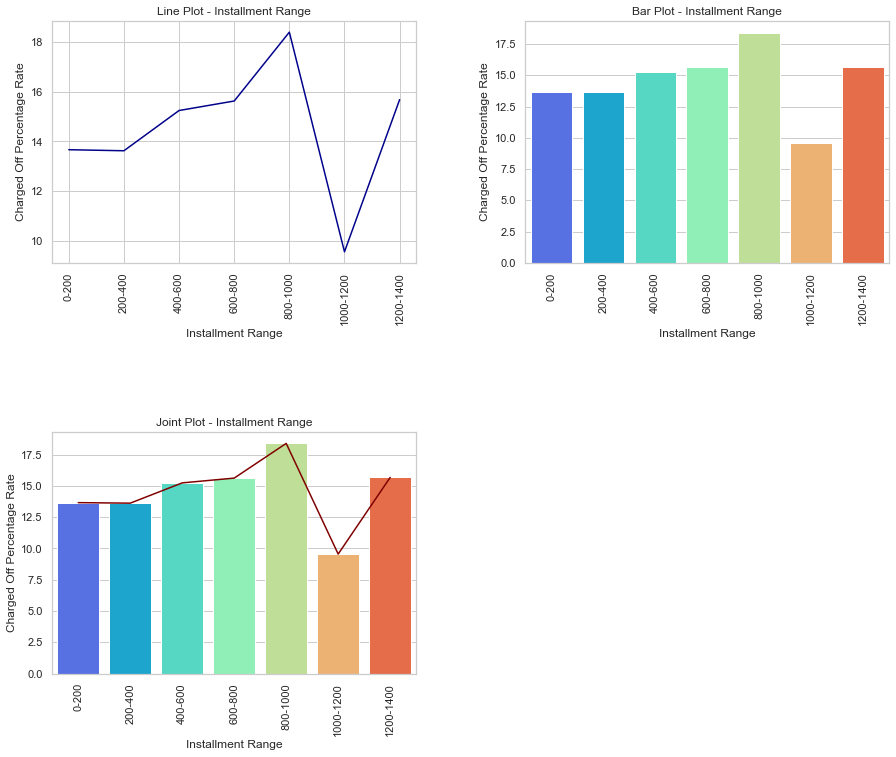

In [78]:
# 5.12 Categorical Variable Analysis: installment against Charged Off Percentage Rate

''' Borrower's Installment has lot of small chunks of data ranging from 20 to 1400. It would be very 
    difficult to perform Data Analysis with this many variations. So, clubbing it into range or intervals.
'''

bins = [0, 200, 400, 600, 800, 1000, 1200, 1400]

rng = ['0-200', '200-400', '400-600', '600-800', '800-1000', '1000-1200', '1200-1400']

fd['installment_rng'] = pd.cut(fd.installment, bins, labels = rng)

df = fd.pivot_table(values = 'funded_amnt',
                      index = 'installment_rng',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0)

df['Total'] = df['Charged Off'] + df['Current'] + df['Fully Paid']

df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))

print(df)
print('\n')
print(df.describe())
print('\n')

xdata = df.index
ydata = df['Charged Off Rate']
# Call Custom Function
plot_bivariate(figsize_x = 15,
               figsize_y = 12,
               subplot_x = 2,
               subplot_y = 2,
               xlabel = "Installment Range",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               hspace = 0.7,
               wspace = 0.3,
               xlabel_rotation = 90)

## According to the Custom range defined, we can infer that:
As the installment increases, Charged Off Rate increases.

loan_status  Charged Off  Current  Fully Paid  Total  Charged Off Rate
dti_rng                                                               
0-5                  580       90        4157   4827           12.0157
5-10                 996      191        6748   7935           12.5520
10-15               1392      268        8163   9823           14.1708
15-20               1385      282        7400   9067           15.2752
20-25               1116      237        5455   6808           16.3925
25-30                 87       53         535    675           12.8889


loan_status  Charged Off  Current  Fully Paid     Total  Charged Off Rate
count             6.0000   6.0000      6.0000    6.0000            6.0000
mean            926.0000 186.8333   5409.6667 6522.5000           13.8825
std             508.4238  95.3591   2780.8995 3361.9168            1.7068
min              87.0000  53.0000    535.0000  675.0000           12.0157
25%             684.0000 115.2500   4481.5000 5322.2500     

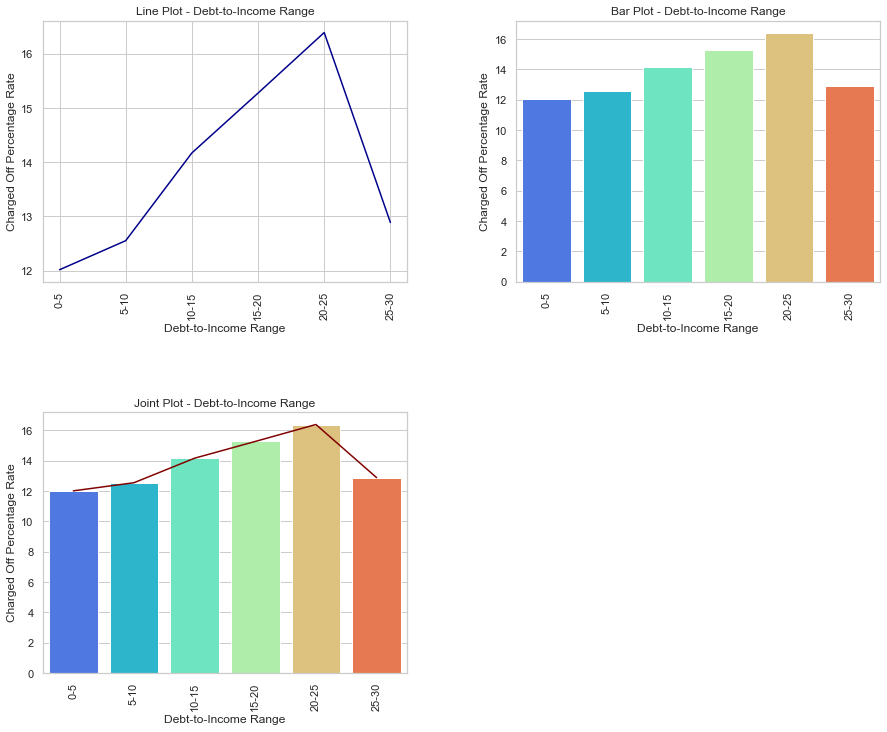

In [79]:
# 5.13 Categorical Variable Analysis: dti against Charged Off Percentage Rate

''' Borrower's Debt-to-Income Ratio has lot of small chunks of data ranging from 0 to 30. It would be very 
    difficult to perform Data Analysis with this many variations. So, clubbing it into range or intervals.
'''

bins = [0, 5, 10, 15, 20, 25, 30]

rng = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30']

fd['dti_rng'] = pd.cut(fd.dti, bins, labels = rng)

df = fd.pivot_table(values = 'funded_amnt',
                      index = 'dti_rng',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0)

df['Total'] = df['Charged Off'] + df['Current'] + df['Fully Paid']

df['Charged Off Rate'] = 100*(round((df['Charged Off']/df['Total']), 6))

print(df)
print('\n')
print(df.describe())
print('\n')

xdata = df.index
ydata = df['Charged Off Rate']
# Call Custom Function
plot_bivariate(figsize_x = 15,
               figsize_y = 12,
               subplot_x = 2,
               subplot_y = 2,
               xlabel = "Debt-to-Income Range",
               ylabel = "Charged Off Percentage Rate",
               x_axis = xdata,
               y_axis = ydata,
               hspace = 0.5,
               wspace = 0.3,
               xlabel_rotation = 90)

## According to the above plot we can say that as dti (Debt-to-Income) value increases, Charged Off Rate increases
Exception is in range 25-30. This is because the population data in this range is not high.

Bivariate Analysis: Continuous Variables

In [80]:
# 5.14 Define Correlation

# Correlation of loan_status = Charged Off
charged_off_df = fd[fd.loan_status == 'Charged Off'].corr().drop(labels = {'out_prncp', 'out_prncp_inv'})

charged_off_df.dropna(axis = 1, how = 'all', inplace = True)

charged_off_df


,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,total_pymnt,total_pymnt_inv,pub_rec_bankruptcies,issue_yr
loan_amnt,1.0000,0.9793,0.9072,0.9261,0.4535,0.0682,-0.0292,0.0062,0.1788,-0.0466,0.2763,0.6807,0.6430,-0.0268,0.1196
funded_amnt,0.9793,1.0000,0.9272,0.9539,0.4453,0.0650,-0.0269,0.0063,0.1751,-0.0512,0.2671,0.6980,0.6603,-0.0314,0.1327
funded_amnt_inv,0.9072,0.9272,1.0000,0.8581,0.4056,0.0763,-0.0317,-0.0183,0.1482,-0.0518,0.2458,0.6853,0.7257,-0.0344,0.3143
installment,0.9261,0.9539,0.8581,1.0000,0.4520,0.0478,-0.0124,0.0164,0.1726,-0.0396,0.2422,0.6663,0.6160,-0.0233,0.0302
annual_inc,0.4535,0.4453,0.4056,0.4520,1.0000,-0.0559,0.0298,0.0627,0.2766,0.0013,0.3743,0.3500,0.3281,0.0079,-0.0047
dti,0.0682,0.0650,0.0763,0.0478,-0.0559,1.0000,-0.0689,-0.0289,0.3021,0.0084,0.2771,0.0463,0.0516,0.0186,0.0948
delinq_2yrs,-0.0292,-0.0269,-0.0317,-0.0124,0.0298,-0.0689,1.0000,-0.0122,-0.0177,-0.0010,0.0611,-0.0159,-0.0227,0.0028,0.0124
inq_last_6mths,0.0062,0.0063,-0.0183,0.0164,0.0627,-0.0289,-0.0122,1.0000,0.0788,0.0147,0.1026,-0.0433,-0.0544,0.0089,-0.0857
open_acc,0.1788,0.1751,0.1482,0.1726,0.2766,0.3021,-0.0177,0.0788,1.0000,0.0508,0.6844,0.1190,0.1054,0.0630,-0.0010
pub_rec,-0.0466,-0.0512,-0.0518,-0.0396,0.0013,0.0084,-0.0010,0.0147,0.0508,1.0000,0.0173,-0.0410,-0.0424,0.8646,-0.0163


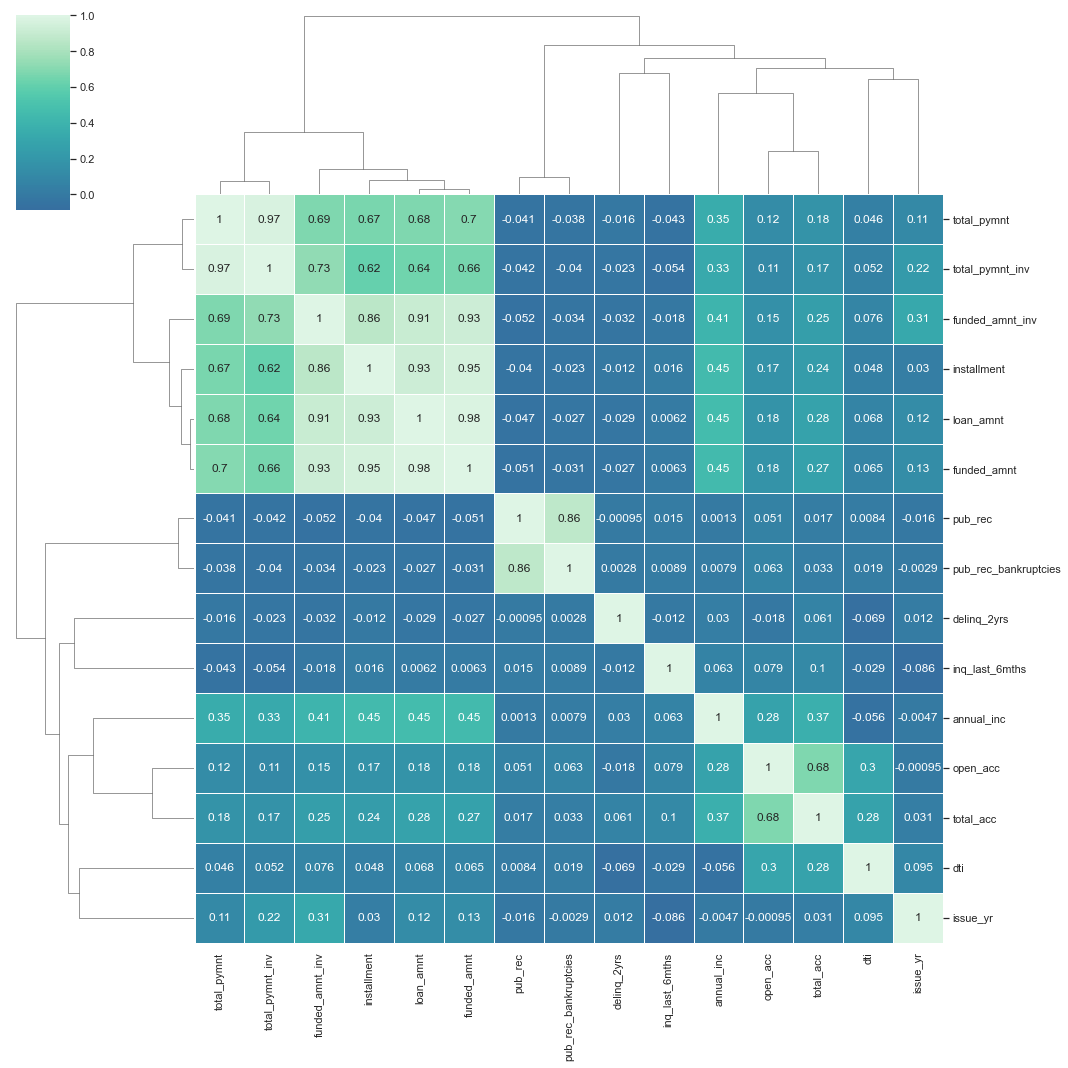

In [81]:
# 5.15 Cluster Map

kwargs = {'annot': True}

sns.clustermap(charged_off_df, center = 0, cmap = 'mako', linewidths = 0.75, figsize = (15, 15), **kwargs)
plt.show()


## From the above Correlation metric, we can infer:
installment, funded_amnt, loan_amnt and funded_amnt_inv are highly correlated (positive) to each other. They form a cluster.

dti (Debt-to-Income Ratio) is high correlated (positive) to issue_yr and vice-versa.

int_rate_percent is negatively correlated to total_acc.

# With the above activity, we came to a Conclusion that the most Charged Off applicant are:

1. People with 36 months loan term  
2. People with Grade B, C, D  
3. People with Sub-grade B3, B5, B4, C1, C2, C3, D2 & D4  
4. People with employment length of 10+ years & <1 year
5. People whose loan was issued in year 2011
6. People with Home ownership as home, rent & other
7. People with Purpose of small_business, renewable_energy & education
8. People with 60 months loan term
9. People from NE (Nebraska), NV (Nevada), SD (South Dakota), AK (Alaska), FL (Florida)

Other bivariate factors are:

1. As the Grade and the Sub Grades increases, Charged Off Rate increases
1. Top 3 employement length of Charged Off category are 1 year, 0 year (< 1year) & 10 year (> 10 year)
1. As Loan amount increases, Charged off rate increases
2. As ineterest increases, Charged off rate increases
5. As the annual income decreases, Charged off rate increases 
6. As the installment rate increases, Charged Off increases
7. As dti value increases, Charged Off rate increases
